# Index of this notebook:
1. **Initial Setup**  <br>
 - Install important libraries
 - Load Data


2. **Data Cleaning:** <br>
 - Adjust column names and dropped irrelevant columns
 - Removing duplicates
 - Removing Null values
 - Adjust review list column
 - Adjust name column
 - Adjust column types
	- Create cost_range column
    - create rate_range column
 - Clean the review list column
 - Clean the dish_like column
 - Create the dish_n_review column
 - Converting comma seperated row elements to lists


3. **Getting Insights through Data Visualization** <br>
 - Correlation
 - Top 10 dish liked and reviewed dish in Gorakhpur
 - Top restaurants type in Gorakhpur
 - Average Cost and Rating for each restaurant type
 - Top 20 cusines in Gorakhpur
 - Let's find top international cuisines
 - Top restaurant service types in Gorakhpur
 - Distribution of aggregate_rating
 - Number of votes vs aggregate_rating
 - Probablity distribution of average_cost
 - Relation of ratings and high cost restaurants
 - Relation of ratings and low cost restaurants
 - Scatter plot for aggregate rating over average cost
 - Restaurant Distribution over locality
 - Aggregate Rating per Locality
 - Cusine trend per Locality
 - Top Dish liked per Locality
 - Service types popular in Gorakhpur
 - Restaurant Types popular in Gorakhpur
 - How many restaurants have online order service & book table service?
 - How the online order service affects the restaurant rating?
 - Which are some of the best restaurants providing online_order?
 - How the book table service affects the restaurant rate?
 - Which are some of the best restaurants providing book_table service??
 - Average Rating according to restaurant service
 - Characteristics of restaurants with book_table service
 - Characteristics of restuarants with online_order service
 - What is the relation between cost and neighbouhood?
 - What is the relation between votes and neighbouhood?
 - What is the relation between meal_type and locality?
 - What is the relation between meal type and the rating?
 - Best rated, most voted restaurants, irrespective of cost
 - Best restaurants in Gorakhpur ?
 - Where can one find the best restaurants in Gorakhpur?
 - Average cost at this overall best restaurants?
 - Top 10 restaurant chain in Gorakhpur
 - Best dessert parlors in Gorakhpur
 - Best Cafe's in Gorakhpur
 - Best bakeries in Gorakhpur
 - Best dine-outs in Gorakhpur
 - Best Sweet shops in Gorakhpur
 - Best North Indian restaurants in Gorakhpur
 - Best South Indian restaurants in Gorakhpur
 - Best Fast- food restaurants in Gorakhpur
 - Best Continental restaurants in Gorakhpur
 - Best Chinese restaurants in Gorakhpur
 - Best Italian restaurants in Gorakhpur
 
 
4. **HeatMap** <br>
 - Heatmap for density of restaurants in Gorakhpur
 
 
5. **Word Analysis** <br>
 - Some of the most famous restaurants in Gorakhpur
 - *Customer reviews*
     - Word Cloud of dish_liked by restaurant_type
     - WordCloud of Reviews by locality
     - Sentiment Analysis of customer reviews
     - Sentiment Analysis of reviews by restaurant_type
     - Sentiment Analysis of reviews by locality
 
 
6. **Predictions** <br>
 - Label encoding online_order and book_table for Regression analysis
 - Multi Label Binarizing (1- hot encoding) cuisines_list feature for Regression analysis

 - * **Aggregate_rating** prediction by Regression Analysis*
     - Train Test split
     - Linear Regression
     - Decision Tree Regression
     - Random Forest Regression
     - Extra Tree Regression
     - Custom Prediction
     - Choose your restaurant features
     - Our custom restaurant dataframe
     - Aggregate_rating prediction through Random Forest
     - Aggregate_rating prediction through Extra Tree Regression


 - *Number of **votes** prediction by Regression Analysis*
     - Train Test split
     - Linear Regression
     - Decision Tree Regression
     - Random Forest Regression
     - Extra Tree Regression
     - Custom Prediction
     - Choose your restaurant features
     - Our custom restaurant dataframe
     - Number of **votes** prediction through Random Forest
     - Number of **votes** prediction through Extra Tree Regression

In [52]:
%pip install nltk
%pip install folium
%pip install vaderSentiment
%pip install wordcloud


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import libraries

In [53]:
# import the needed libraries
import numpy as np
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = 10,6
plt.xkcd()
%matplotlib inline

from wordcloud import WordCloud
from folium.plugins import HeatMap
import folium
from tqdm import tqdm
import re
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import r2_score

## Load Dataset

In [54]:
# load data to pandas dataframe
df = pd.read_csv('zomato_gorakhpur.csv', engine='python')

In [55]:
df

Sr no.                                               name  \
0        0.0                                      Namo Sandwich   
1        1.0                                       Bake N Shake   
2        2.0                                    Shree Gurukripa   
3        3.0                                  Nafees Restaurant   
4        4.0                                   Hotel Guru Kripa   
...      ...                                                ...   
2918  2953.0                One Asia - Gorakhpur Marriott Hotel   
2919  2954.0                          Constellation - Hotel WOW   
2920  2955.0                        Ni Hao - Radisson Blu Hotel   
2921  2956.0                    Indiya Oye - Radisson Blu Hotel   
2922  2957.0  Gorakhpur Baking Company - Gorakhpur Marriott ...   

                                   locality   latitude  longitude  \
0                              Sudama Nagar  22.696331  75.834857   
1                  BCM Heights, Vijay Nagar  22.755705  75.895287   
2                         Sarwate Bus Stand  22.714090  75.868851   
3                               Old Palasia  22.725712  75.887757   
4                         Sarwate Bus Stand  22.714086  75.868846   
...                                     ...        ...        ...   
2918  Gorakhpur Marriott Hotel, Vijay Nagar  22.752747  75.883751   
2919                 Hotel Wow, Vijay Nagar  22.749182  75.895365   
2920        Radisson Blu Hotel, Vijay Nagar  22.750030  75.903471   
2921        Radisson Blu Hotel, Vijay Nagar  22.750035  75.903480   
2922  Gorakhpur Marriott Hotel, Vijay Nagar  22.752877  75.883453   

                          cuisines  average_cost_for_two  aggregate_rating  \
0                        Fast Food                 500.0               4.3   
1          Cafe, Fast Food, Bakery                 500.0               4.2   
2                     North Indian                 350.0               4.3   
3            North Indian, Mughlai                 800.0               4.3   
4                     North Indian                 350.0               4.3   
...                            ...                   ...               ...   
2918                Chinese, Asian                2000.0               4.5   
2919  North Indian, Asian, Italian                1800.0               4.2   
2920         Asian, Chinese, Momos                1850.0               4.6   
2921        North Indian, Kashmiri                1850.0               4.3   
2922                        Bakery                1500.0               4.4   

       votes  rating_text online_order book_table                   rest_type  \
0      860.0    Very Good          Yes        Yes               Casual Dining   
1      683.0    Very Good          Yes         No               Casual Dining   
2     2030.0    Very Good          Yes         No         Cafe, Casual Dining   
3     2987.0    Very Good           No         No                 Quick Bites   
4     3441.0    Very Good           No         No               Casual Dining   
...      ...          ...          ...        ...                         ...   
2918   320.0      Terbaik          Yes         No                 Quick Bites   
2919   285.0    Very Good          Yes         No  Quick Bites, Beverage Shop   
2920   248.0      Terbaik          Yes        Yes               Casual Dining   
2921   200.0  Sangat Baik          Yes         No               Casual Dining   
2922   197.0    Very Good          Yes        Yes               Casual Dining   

                                             dish_liked  \
0     Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1     Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2     Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                           Masala Dosa   
4                                   Panipuri, Gol Gappe   
...                                                 ...   
2918                                             

In [56]:
# get some info about data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sr no.                2844 non-null   float64
 1   name                  2844 non-null   object 
 2   locality              2844 non-null   object 
 3   latitude              2844 non-null   float64
 4   longitude             2844 non-null   float64
 5   cuisines              2844 non-null   object 
 6   average_cost_for_two  2844 non-null   float64
 7   aggregate_rating      2844 non-null   float64
 8   votes                 2844 non-null   float64
 9   rating_text           2844 non-null   object 
 10  online_order          2755 non-null   object 
 11  book_table            2755 non-null   object 
 12  rest_type             2743 non-null   object 
 13  dish_liked            1168 non-null   object 
 14  reviews_list          2750 non-null   object 
 15  listed_in(type)      

# Cleaning Data

In [57]:
# make a copy of our data
data = df.copy()

## 1. Adjust column names and dropped irrelevant columns

In [58]:
# drop unnecessary columns
column_to_drop = ['Sr no.']
data.drop(columns=column_to_drop, axis=1,inplace=True)

In [59]:
# rename non descriptive columns
# As per metadat 'listed_in(type)' is a type of meal
data.rename(columns={'average_cost_for_two': 'average_cost', 'listed_in(type)': 'meal_type'}, inplace=True)

In [60]:
# check the columns now
data.columns

Index(['name', 'locality', 'latitude', 'longitude', 'cuisines', 'average_cost',
       'aggregate_rating', 'votes', 'rating_text', 'online_order',
       'book_table', 'rest_type', 'dish_liked', 'reviews_list', 'meal_type'],
      dtype='object')

In [61]:
data.dropna()

name  \
0                                         Namo Sandwich   
1                                          Bake N Shake   
2                                       Shree Gurukripa   
3                                     Nafees Restaurant   
4                                      Hotel Guru Kripa   
...                                                 ...   
2912                       SD 21 - Hotel Somdeep Palace   
2914       Gorakhpur Kitchen - Gorakhpur Marriott Hotel   
2919                          Constellation - Hotel WOW   
2920                        Ni Hao - Radisson Blu Hotel   
2922  Gorakhpur Baking Company - Gorakhpur Marriott ...   

                                   locality   latitude  longitude  \
0                              Sudama Nagar  22.696331  75.834857   
1                  BCM Heights, Vijay Nagar  22.755705  75.895287   
2                         Sarwate Bus Stand  22.714090  75.868851   
3                               Old Palasia  22.725712  75.887757   
4                         Sarwate Bus Stand  22.714086  75.868846   
...                                     ...        ...        ...   
2912      Hotel Somdeep Palace, Vijay Nagar  22.750035  75.903482   
2914  Gorakhpur Marriott Hotel, Vijay Nagar  22.752949  75.883409   
2919                 Hotel Wow, Vijay Nagar  22.749182  75.895365   
2920        Radisson Blu Hotel, Vijay Nagar  22.750030  75.903471   
2922  Gorakhpur Marriott Hotel, Vijay Nagar  22.752877  75.883453   

                                     cuisines  average_cost  aggregate_rating  \
0                                   Fast Food         500.0               4.3   
1                     Cafe, Fast Food, Bakery         500.0               4.2   
2                                North Indian         350.0               4.3   
3                       North Indian, Mughlai         800.0               4.3   
4                                North Indian         350.0               4.3   
...                                       ...           ...               ...   
2912                    North Indian, Chinese        1100.0               4.6   
2914  North Indian, Italian, Asian, Fast Food        1800.0               4.4   
2919             North Indian, Asian, Italian        1800.0               4.2   
2920                    Asian, Chinese, Momos        1850.0               4.6   
2922                                   Bakery        1500.0               4.4   

       votes rating_text online_order book_table                   rest_type  \
0      860.0   Very Good          Yes        Yes               Casual Dining   
1      683.0   Very Good          Yes         No               Casual Dining   
2     2030.0   Very Good          Yes         No         Cafe, Casual Dining   
3     2987.0   Very Good           No         No                 Quick Bites   
4     3441.0   Very Good           No         No               Casual Dining   
...      ...         ...          ...        ...                         ...   
2912   959.0     Terbaik          Yes         No                 Quick Bites   
2914   634.0   Very Good          Yes         No                 Quick Bites   
2919   285.0   Very Good          Yes         No  Quick Bites, Beverage Shop   
2920   248.0     Terbaik          Yes        Yes               Casual Dining   
2922   197.0   Very Good          Yes        Yes               Casual Dining   

                                             dish_liked  \
0     Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1     Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2     Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                           Masala Dosa   
4                                   Panipuri, Gol Gappe   
...                                                 ...   
2912  Sea Food, Neer Dosa, Fish, Crab Sukha, Biryani...   
2914  Honey Chilli Potatoes, Nachos, Lemonade, Hakka...   
2919  Burgers, Nachos, Oreo Shake, Veg Sandwich,

## 2. Removing duplicates
- Removing duplicates data when the entire rows is duplicated
- As same name could be available for other meal types and hence other ratings and average cost (this is a chain restaurant)

In [62]:
# check for duplicate values
data.duplicated().sum()

93

In [63]:
# drop the duplicates
data.drop_duplicates(inplace=True)

## 3. Removing Null values

In [64]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(2)

name                 0.04
locality             0.04
latitude             0.04
longitude            0.04
cuisines             0.04
average_cost         0.04
aggregate_rating     0.04
votes                0.04
rating_text          0.04
online_order         2.86
book_table           2.86
rest_type            3.29
dish_liked          58.73
reviews_list         3.04
meal_type            7.14
dtype: float64

In [65]:
data= data[data['meal_type']!='']
data= data[data['meal_type'].astype(str).map(len) < 10]
data= data[data['meal_type'].notna()]

In [66]:
# check for unique values in the aggregate_rating column
data.aggregate_rating.unique()

array([4.3, 4.2, 4.1, 4.6, 3.9, 4.7, 4. , 4.8, 4.9, 3.8, 4.4, 4.5, 3.7,
       3.6, 3.3, 3.5, 3.4, 3.2, 3.1, 3. , 2.5, 2.9, 2.8, 2.7, 2.1, 2.2,
       2.3, 2.4, 2.6])

In [67]:
data= data[data['online_order'].astype('str').map(len) < 4]

Back to our job for deleting Null values
> - We are intersted in this analysis for the aggregate_rating and average_cost relationship , so we'll drop null values in these two columns
- But first let's have a look on the review list column
- We here are trying to save as much of our data

## 4. Adjust  review list column
> - This column appears as string instead of list of tuples
- using ast library to return it back to list and then accessing it for more and easy analysis
- extract the review text only from each tuple in each list and clear it
-  make a new column reviews_text

In [68]:
# if we check for each value type
type(data.reviews_list[0])

str

In [69]:
# return to a list of tuples
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))

In [70]:
# check for our work now
type(data.reviews_list[0])

list

In [71]:
# check for the first input
data.reviews_list[0][0]

('Rated 4.0',
 'RATED\n  A beautiful place to dine in.The interiors take you back to the Mughal era. The lightings are just perfect.We went there on the occasion of Christmas and so they had only limited items available. But the taste and service was not compromised at all.The only complaint is that the breads could have been better.Would surely like to come here again.')

In [72]:
# drop null values for aggregate_rating and average_cost as they would be compared later
data.dropna(subset=['aggregate_rating', 'average_cost'],inplace=True)

In [73]:
# test for data size
data.shape

(2519, 15)

In [74]:
# check for percentage of null values 
((data.isna().sum()/data.shape[0])*100).round(2)

name                 0.00
locality             0.00
latitude             0.00
longitude            0.00
cuisines             0.00
average_cost         0.00
aggregate_rating     0.00
votes                0.00
rating_text          0.00
online_order         0.00
book_table           0.00
rest_type            0.44
dish_liked          62.45
reviews_list         0.00
meal_type            0.00
dtype: float64

## 5. Adjust name column
> To unify the name column we will make all values as titles

In [75]:
# fix the name column
data.name = data.name.apply(lambda x: x.title())

## 6. Adjust column types 
> - online_order & book_table presented as strings instead of bools (working with True/False make it easier to analyze)
- average-cost as strings instead of int
- add the cost_range column for ease of classification

In [76]:
# convert Yes/No to True/False in coumns online_order & book_table
data.online_order.replace(('Yes','No'),(True,False),inplace =True)
data.book_table.replace(('Yes','No'),(True,False),inplace =True)

/tmp/ipykernel_8357/3302224916.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.online_order.replace(('Yes','No'),(True,False),inplace =True)
/tmp/ipykernel_8357/3302224916.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.online_order.replace(('Yes','No'),(True,False),inplace =True)


In [77]:
# check for values
data.average_cost.unique()

array([ 500.,  350.,  800.,  450.,  600., 1100.,  400., 1800.,  300.,
       1200., 1500.,  900., 1400.,  100.,  200., 1000., 1950.,  750.,
        250., 1300.,  700.,  150.,  550., 2600., 2500., 2400., 2000.,
       1900., 1875., 1850., 1600.,   50.,  850.,  650.])

### Notes:
- we are going to make a new column of cost_ranges which will be as follows:
> - very cheap : 0-200
 - cheap : 200-500
 - moderate : 500-1000 
 - expensive : 1000-3000
 - very expensive : 3000-6000
- we will do the same for average_rate column, so we can get insights from categories

### Create cost_range column

In [78]:
bins = [0,200, 500, 1000, 3000, 6000]
labels = ['very cheap','cheap','moderate','expensive','very expensive']
data['cost_range']= pd.cut(data.average_cost, bins=bins,labels=labels)

In [79]:
data.loc[:,['average_cost','cost_range']]

average_cost cost_range
0            500.0      cheap
1            500.0      cheap
2            350.0      cheap
3            800.0   moderate
4            350.0      cheap
...            ...        ...
2918        2000.0  expensive
2919        1800.0  expensive
2920        1850.0  expensive
2921        1850.0  expensive
2922        1500.0  expensive

[2519 rows x 2 columns]

### Create rate_range column

In [80]:
# we will do the same for aggregate_rating column
bins =[0,2,3,4,5]
labels =['low','moderate','high','exceptional']
data['rate_range'] = pd.cut(data.aggregate_rating, bins=bins,labels=labels)

In [81]:
data.loc[:,['aggregate_rating','rate_range']]

aggregate_rating   rate_range
0                  4.3  exceptional
1                  4.2  exceptional
2                  4.3  exceptional
3                  4.3  exceptional
4                  4.3  exceptional
...                ...          ...
2918               4.5  exceptional
2919               4.2  exceptional
2920               4.6  exceptional
2921               4.3  exceptional
2922               4.4  exceptional

[2519 rows x 2 columns]

## 7. Clean the review list column 
> - After returning it back to its nature of a list of tuples, we are able now to extract the reviews text
- hope to get more insights about each restaurants from its reviewers

In [82]:
# clear the text
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').strip().lower()

In [83]:
# make a new column reviews_text
data['reviews_text'] = data.reviews_list.apply(lambda x: clear_text(x))

In [84]:
# check part of reviews text for the first restaurant
data.reviews_text[0][:500]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrange'

## 8. Clean the dish_like  column 

> - make it all as lowercase.
- some missing values could be extracted also from the review_list

In [85]:
data.dish_liked.nunique()

633

In [86]:
# make lower case
data.dish_liked = data.dish_liked.apply(lambda x:x.lower().strip() if isinstance(x,str) else x)

In [87]:
# collect the dishes' names and make a menu list for all kind of dishes
menu_list = [e.strip() for i in data.dish_liked.tolist() if isinstance(i,str) and len(i) >0 for e in i.split(',')]

# Now collect the unique dish name 
menu_set = set(menu_list)

As we now has the unique list of dishes we now could replace those with null values with some useful data

In [88]:
# the solution 
menu_set.intersection(data.reviews_text[1000].split(' '))

{'biryani', 'raita'}

Cool !!, Now we could do that for all other missing values in dish_liked column but first let's create the dish_n_review column

## 9. Create the dish_n_review  column 

> - extact the dish been reviewed from the review text

In [89]:
#creat a new column for the reviewed dish
data['dish_n_review'] = data.reviews_text.apply(lambda x: ', '.join(list(menu_set.intersection(x.split(' ')))))

In [90]:
# get sample to compare
data.query('dish_liked != dish_liked')[['dish_liked','dish_n_review']].sample(5,random_state=1)

dish_liked                      dish_n_review
226         NaN               thali, biryani, rice
2052        NaN                                   
373         NaN                               roti
1758        NaN                                   
2302        NaN  sandwich, manchurian, momos, rice

So now, we can replace this missed values from the dish_n_review

In [91]:
# fill in the missing values in dish_liked column with data from reviews
nan_index = data.query('dish_liked != dish_liked & dish_n_review == dish_n_review').index
for i in nan_index:
    data.loc[i,'dish_liked'] = data.loc[i,'dish_n_review']

- Now we can drop the menu_list & menu_set

In [92]:
del menu_list
del menu_set

In [93]:
# check for null values
((data.isna().sum()/data.shape[0])*100).round(3)

name                0.000
locality            0.000
latitude            0.000
longitude           0.000
cuisines            0.000
average_cost        0.000
aggregate_rating    0.000
votes               0.000
rating_text         0.000
online_order        0.000
book_table          0.000
rest_type           0.437
dish_liked          0.000
reviews_list        0.000
meal_type           0.000
cost_range          0.000
rate_range          0.000
reviews_text        0.000
dish_n_review       0.000
dtype: float64

> - I guess it's quiet clean now.
- It's time for the fun part of getting insights with data visualtisation

## 10. Converting comma seperated row elements to lists

In [94]:
best_cafe= data['rest_type'].apply(lambda x: str(x).strip().split(','))
data['rest_type_list']= pd.DataFrame(best_cafe)

#dish_liked_list= data['dish_liked'].apply(lambda x: str(x).strip().split(','))
#data['dish_liked_list']= pd.DataFrame(dish_liked_list)

cuisines_list= data['cuisines'].apply(lambda x: str(' '+str(x)).split(','))
data['cuisines_list']= pd.DataFrame(cuisines_list)

data

name  \
0                                         Namo Sandwich   
1                                          Bake N Shake   
2                                       Shree Gurukripa   
3                                     Nafees Restaurant   
4                                      Hotel Guru Kripa   
...                                                 ...   
2918                One Asia - Gorakhpur Marriott Hotel   
2919                          Constellation - Hotel Wow   
2920                        Ni Hao - Radisson Blu Hotel   
2921                    Indiya Oye - Radisson Blu Hotel   
2922  Gorakhpur Baking Company - Gorakhpur Marriott ...   

                                   locality   latitude  longitude  \
0                              Sudama Nagar  22.696331  75.834857   
1                  BCM Heights, Vijay Nagar  22.755705  75.895287   
2                         Sarwate Bus Stand  22.714090  75.868851   
3                               Old Palasia  22.725712  75.887757   
4                         Sarwate Bus Stand  22.714086  75.868846   
...                                     ...        ...        ...   
2918  Gorakhpur Marriott Hotel, Vijay Nagar  22.752747  75.883751   
2919                 Hotel Wow, Vijay Nagar  22.749182  75.895365   
2920        Radisson Blu Hotel, Vijay Nagar  22.750030  75.903471   
2921        Radisson Blu Hotel, Vijay Nagar  22.750035  75.903480   
2922  Gorakhpur Marriott Hotel, Vijay Nagar  22.752877  75.883453   

                          cuisines  average_cost  aggregate_rating   votes  \
0                        Fast Food         500.0               4.3   860.0   
1          Cafe, Fast Food, Bakery         500.0               4.2   683.0   
2                     North Indian         350.0               4.3  2030.0   
3            North Indian, Mughlai         800.0               4.3  2987.0   
4                     North Indian         350.0               4.3  3441.0   
...                            ...           ...               ...     ...   
2918                Chinese, Asian        2000.0               4.5   320.0   
2919  North Indian, Asian, Italian        1800.0               4.2   285.0   
2920         Asian, Chinese, Momos        1850.0               4.6   248.0   
2921        North Indian, Kashmiri        1850.0               4.3   200.0   
2922                        Bakery        1500.0               4.4   197.0   

      rating_text  online_order  ...                   rest_type  \
0       Very Good          True  ...               Casual Dining   
1       Very Good          True  ...               Casual Dining   
2       Very Good          True  ...         Cafe, Casual Dining   
3       Very Good         False  ...                 Quick Bites   
4       Very Good         False  ...               Casual Dining   
...           ...           ...  ...                         ...   
2918      Terbaik          True  ...                 Quick Bites   
2919    Very Good          True  ...  Quick Bites, Beverage Shop   
2920      Terbaik          True  ...               Casual Dining   
2921  Sangat Baik          True  ...               Casual Dining   
2922    Very Good          True  ...               Casual Dining   

                                             dish_liked  \
0     pasta, lunch buffet, masala papad, paneer laja...   
1     momos, lunch buffet, chocolate nirvana, thai g...   
2     churros, cannelloni, minestrone soup, hot choc...   
3                                           masala dosa   
4                                   panipuri, gol gappe   
...                                                 ...   
2918                                                      
2919  burgers, nachos, oreo shake, veg sandwich, veg...   
2920  murgh ghee roast, mutton biryani, buttermilk, ...   
2921                                            biryani   
2922  pasta, pizza, steak, mojito, salads, tiramisu,...   

                                           reviews

In [95]:
# set a function to count the values in a comma separated string 
def clear_text_2pd(x):
    'extract the data and count it from comma separted string values in column x returns a pd.Series ready to plot'
    return pd.Series([e.strip() for i in data[data[x].notnull()][x] for e in i.split(',') if e!='[]' if i ])

# Getting Insights through Data Visualization

In [96]:
# plotting parameters
# set the color for all graphs
colors = ['grey' for i in range(data.locality.nunique())]
colors[0] = 'orange'

In [97]:
# collect the column with string (object type)
str_cols = [i for i in data.columns if (data[i].dtypes == object)]
# show a sample of these columns
data[str_cols].sample(5,random_state=1)

name              locality  \
1154             Cafe Xoxo           Vijay Nagar   
1275      Cafe Blue Turtle  By Pass Road (North)   
775                    D2I        Sapna Sangeeta   
1664               Smaaash        South Tukoganj   
610   The Groundbaking Co.           Vijay Nagar   

                                   cuisines rating_text      rest_type  \
1154                          Cafe, Chinese        Good  Casual Dining   
1275  Cafe, Italian, Continental, Beverages        Good    Quick Bites   
775          North Indian, Mughlai, Chinese        Good    Quick Bites   
1664                            Finger Food     Average       Delivery   
610           Pizza, Continental, Beverages   Very Good           Cafe   

                                             dish_liked  \
1154  chicken grill, fish, shawarma, rolls, tandoori...   
1275                                                      
775                                             paratha   
1664                                                      
610   mocktails, peri fries, lasagne, pizza, chicken...   

                                           reviews_list meal_type  \
1154  [(Rated 3.0, RATED\n  It is a basic restaurant...  Delivery   
1275  [(Rated 1.0, RATED\n  Horrible Food\nI ordered...  Delivery   
775   [(Rated 3.0, RATED\n  Place is situated on a r...  Dine-out   
1664  [(Rated 5.0, RATED\n  Made the Christmas speci...  Delivery   
610   [(Rated 1.0, RATED\n \n\nHorrible. Not even ki...  Dine-out   

                                           reviews_text  \
1154  it is a basic restaurant & offers value for mo...   
1275  horrible foodi ordered for masala dosa and mas...   
775   place is situated on a road side, ppl allergic...   
1664  made the christmas special  awesome plum cake ...   
610   rated horrible  not even kidding  we ordered b...   

                                          dish_n_review   rest_type_list  \
1154                                            biryani  [Casual Dining]   
1275                                                       [Quick Bites]   
775                                             paratha    [Quick Bites]   
1664                                                          [Delivery]   
610   fish, lasagne, pizza, vegetarian, wings, manch...           [Cafe]   

                                    cuisines_list  
1154                            [ Cafe,  Chinese]  
1275  [ Cafe,  Italian,  Continental,  Beverages]  
775           [ North Indian,  Mughlai,  Chinese]  
1664                               [ Finger Food]  
610            [ Pizza,  Continental,  Beverages]

A lot of the values in these columns appeared as comma separated and contains much information behind if we split it and count each separately

## **Correlation**

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

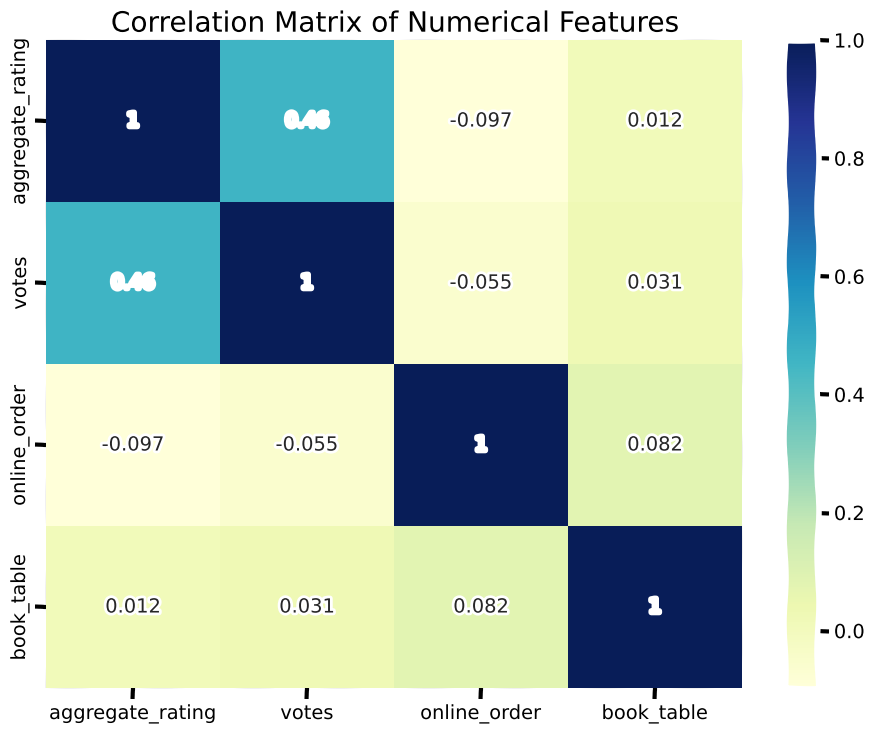

In [101]:
#sns.heatmap(data[['aggregate_rating','average_cost','votes','online_order','book_table','cuisines','rating_text','rest_type','meal_type','rate_range','cost_range']].corr(),cmap="YlGnBu",  annot=True);
# Adjust this list based on the actual columns present in your DataFrame
numerical_cols = ['aggregate_rating', 'votes', 'online_order', 'book_table']  # Update with available numerical columns

# Convert 'online_order' and 'book_table' to numerical values if they are categorical
if 'online_order' in df.columns:
    df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
if 'book_table' in df.columns:
    df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Ensure that only these columns are included in the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Votes** and **aggregate_rating** has relatively higher co-relation, followed by **average_cost** and **aggregate_rating**.

**Online_order** has small negative co-relation with **aggregate_rating, average_cost and votes**.

**Book_table** has almost no co-relation with **aggregate_rating, average_cost, votes** and **online_order**, thus it seems, **book_table** service can be eliminated, without any effect on rating, votes, and cost 

### Top 20 dish liked and reviewed dish in Gorakhpur

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
f

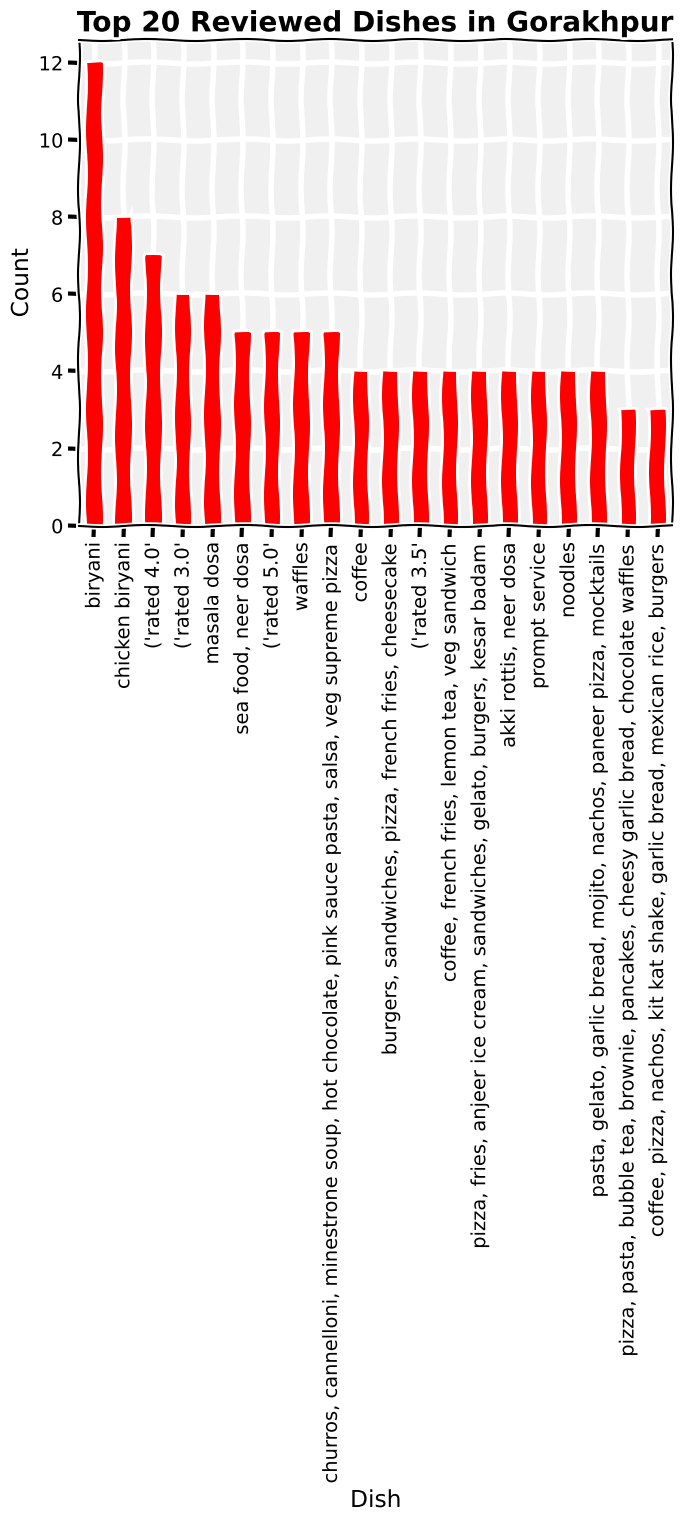

In [104]:
'''
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 15,9
plt.subplot(1,2,1)
# top 20 reviewed dishes
clear_text_2pd('dish_n_review').value_counts()[:20].plot('bar',color='red',grid=True)
plt.title('Top 20 reviewed dishes in Gorakhpur', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

# top 20 dish_liked
plt.subplot(1,2,2)
clear_text_2pd('dish_liked').value_counts()[:20].plot('bar',color='orange',grid=True)
plt.title('Top 20 liked dishes in Gorakhpur', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')
plt.tight_layout();
'''
# Define a function to clean text and convert to pandas DataFrame if necessary
def clear_text_2pd(column_name):
    # Assuming clear_text_2pd is a placeholder for the actual text processing
    # For example, if it's meant to clean and return the column data as a pandas Series:
    return df[column_name].str.lower().str.replace('[^\w\s]', '')

# Create the subplot
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)

# Top 20 reviewed dishes
clear_text_2pd('dish_liked').value_counts()[:20].plot(kind='bar', color='red', grid=True)
plt.title('Top 20 Reviewed Dishes in Gorakhpur', weight='bold')
plt.xlabel('Dish')
plt.ylabel('Count')

# Show the plot
plt.tight_layout()
plt.show()

## Top restaurants type in Gorakhpur

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

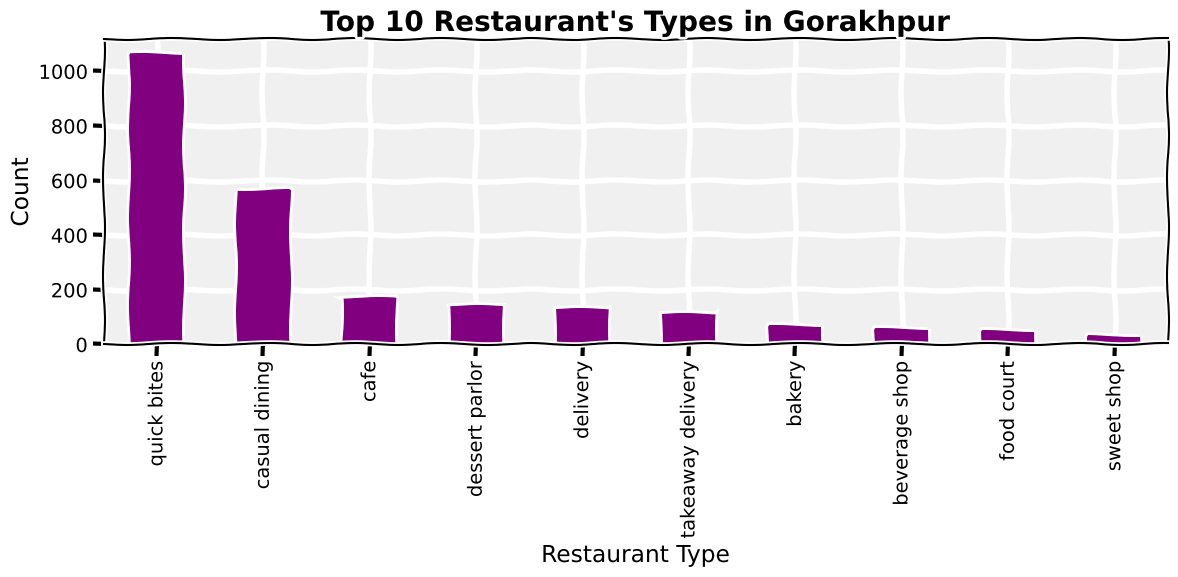

In [106]:
'''
# plot 2 bar plots
plt.rcParams['figure.figsize'] = 12,6

# top 10 restaurants types
clear_text_2pd('rest_type').value_counts()[:10].plot('bar',color='purple',grid=True)
plt.title('Top 10 resturant\'s types in Gorakhpur', weight='bold')
plt.xlabel('Restaurant Type')
plt.ylabel('Count');
plt.tight_layout();
plt.xticks(rotation=30)
'''
# Function to clean text (modify as needed based on your requirements)
def clear_text_2pd(rest_type):
    return df[rest_type].str.lower().str.replace('[^\w\s]', '', regex=True)

# Check if the assumed column exists
if 'rest_type' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Top 10 restaurant types
    clear_text_2pd('rest_type').value_counts()[:10].plot(kind='bar', color='purple', grid=True)
    plt.title("Top 10 Restaurant's Types in Gorakhpur", weight='bold')
    plt.xlabel('Restaurant Type')
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
else:
    print("Column 'rest_type' not found in the DataFrame.")

- **Quick Bites** is the most common restaurant type in Gorakhpur, followed by **Casual Dining**.

Business wise, one should be careful before going into **Quick Bites** restaurants as more than 1000 restaurants serve in this category !

### Number of votes vs aggregate_rating

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

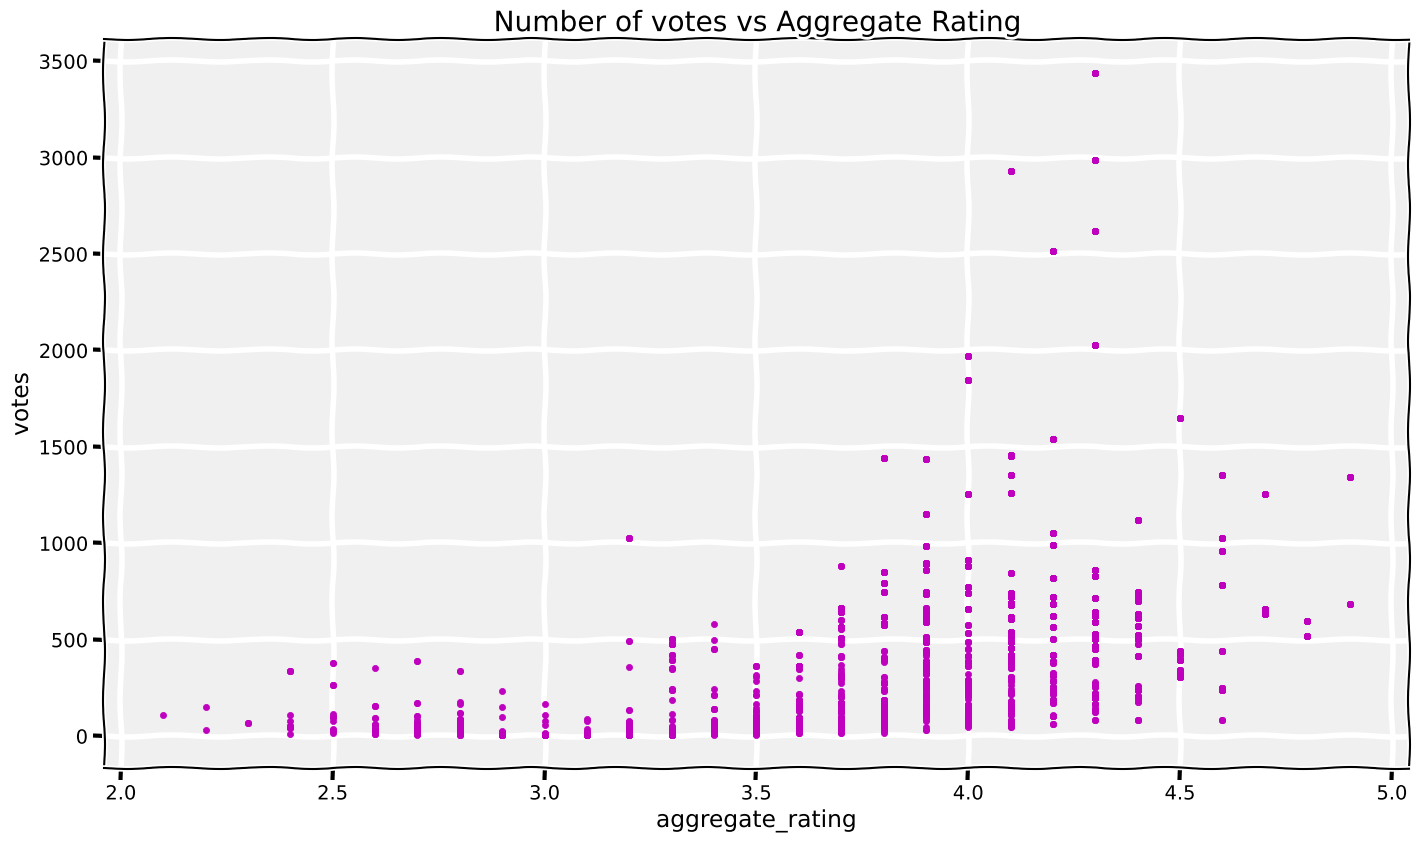

In [115]:
# votes vs rate
plt.rcParams['figure.figsize'] = 15,9
data.plot(kind='scatter',x='aggregate_rating',y='votes',marker='o',color='m',grid=True)
plt.title('Number of votes vs Aggregate Rating');

**Aggregate_rating** between **3.5** and **4.5** has highest number of **votes**.

### Probablity distribution of average_cost

/tmp/ipykernel_8357/779711822.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['average_cost'])


Text(0.5, 1.0, 'Probablity distribution of average_cost')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

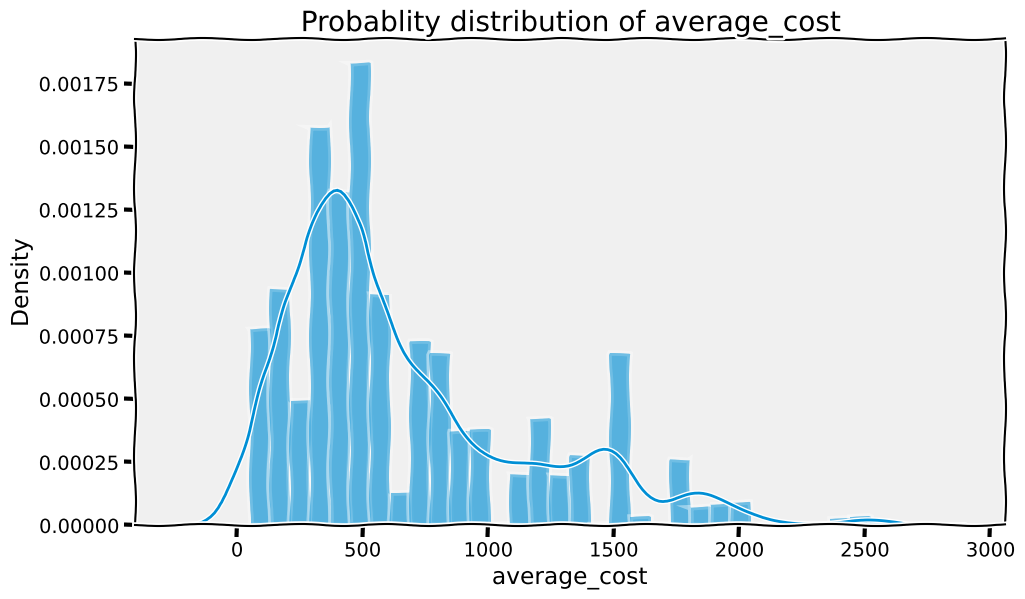

In [116]:
plt.figure(figsize=(10,6))
sns.distplot(data['average_cost'])
# y-axis -> probablity density function (PDF)
plt.title('Probablity distribution of average_cost')

Most of the restaurants are in the **average_cost** range of **100** to **1000**.

### Relation of ratings and high cost restaurants

/tmp/ipykernel_8357/3550151383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='average_cost', data=high_cost, ax=ax, palette='PuBu')


Text(0, 0.5, 'Mean Rating')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

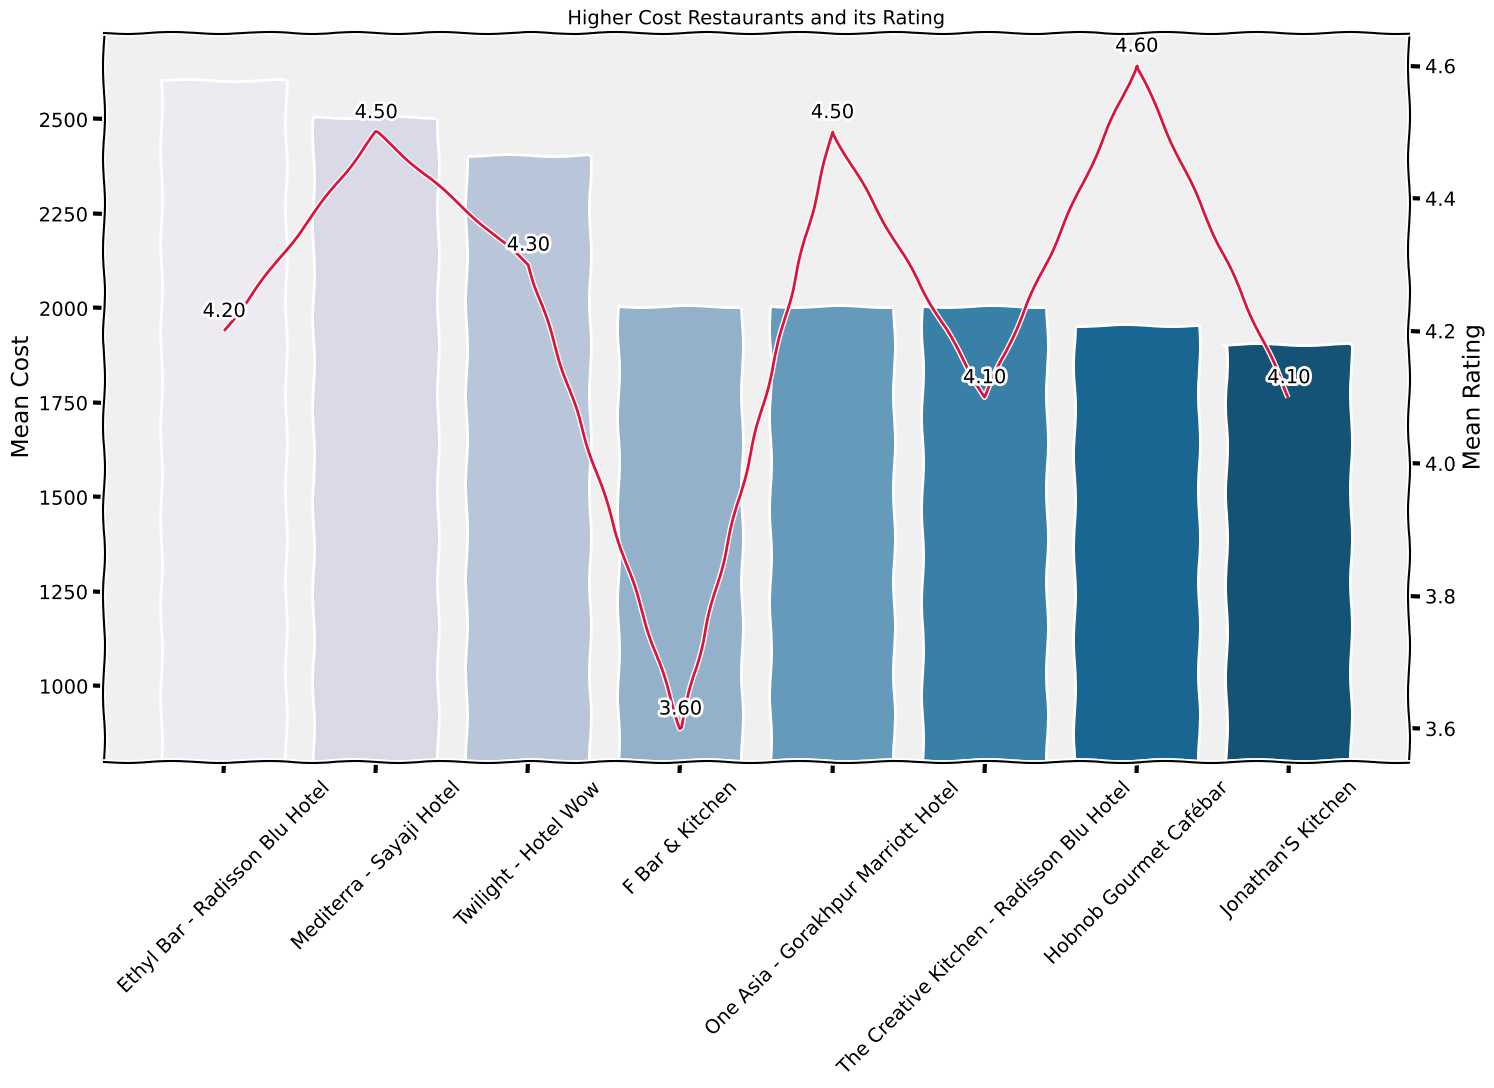

In [117]:
high_cost = data.sort_values(by='average_cost',ascending=False).iloc[:50, np.r_[0, 5, 6]].drop_duplicates()
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='name', y='average_cost', data=high_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='name', y='aggregate_rating', data=high_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(800,)
#ax2.set_ylim([3.4, 5])

ax.xaxis.set_label_text("")

xs = np.arange(0,10,1)
ys = high_cost['aggregate_rating']

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Higher Cost Restaurants and its Rating', size=14)
ax.set_ylabel('Mean Cost')
ax2.set_ylabel('Mean Rating')
#plt.tight_layout()

High cost restaurants have varied mean rating, but generally > 4

### Relation of ratings and low cost restaurants

/tmp/ipykernel_8357/494393573.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='average_cost', data=low_cost, ax=ax, palette='PuBu')
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 

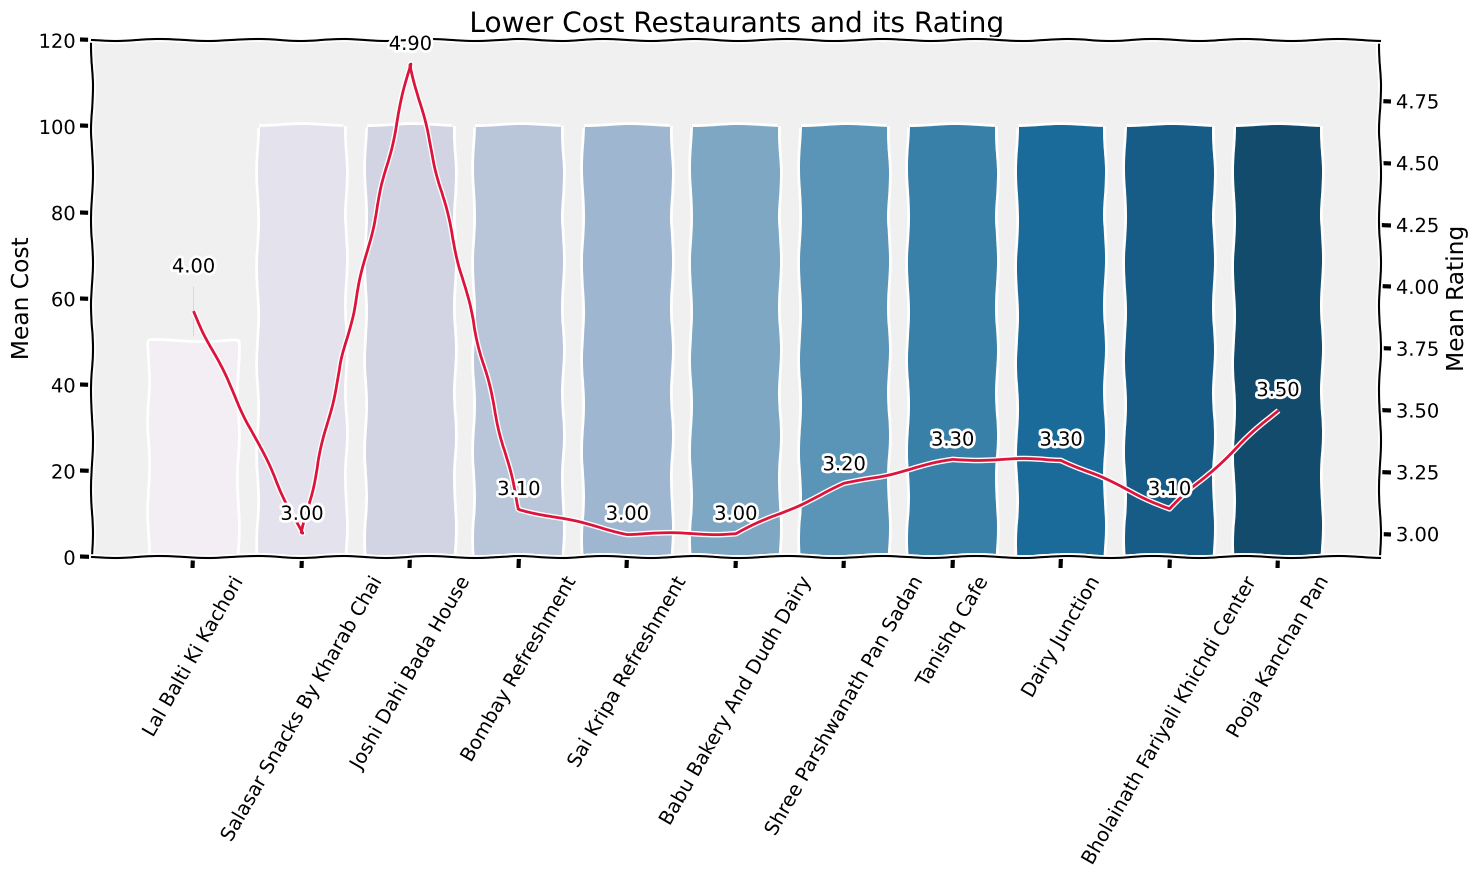

In [118]:
low_cost = data.sort_values(by='average_cost', ascending=True).iloc[:15, np.r_[0, 5, 6]].drop_duplicates()
fig, ax = plt.subplots(figsize=(15, 9))
sns.barplot(x='name', y='average_cost', data=low_cost, ax=ax, palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(x='name', y='aggregate_rating', data=low_cost, ax=ax2, color='crimson', sort=False)
ax.tick_params(axis='x', labelrotation=60)
ax.set_ylim([0, 120])

ax.xaxis.set_label_text("")

xs = np.arange(0,15,1)
ys = low_cost['aggregate_rating']

for x,y in zip(xs-1,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', # horizontal alignment can be left, right or center
                 color='black')

ax.set_title('Lower Cost Restaurants and its Rating')
ax.set_ylabel('Mean Cost')
ax2.set_ylabel('Mean Rating')
plt.tight_layout()

Low cost restaurants have mean ratings generally around 3.5.

### Scatter plot for aggregate rating over average cost

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

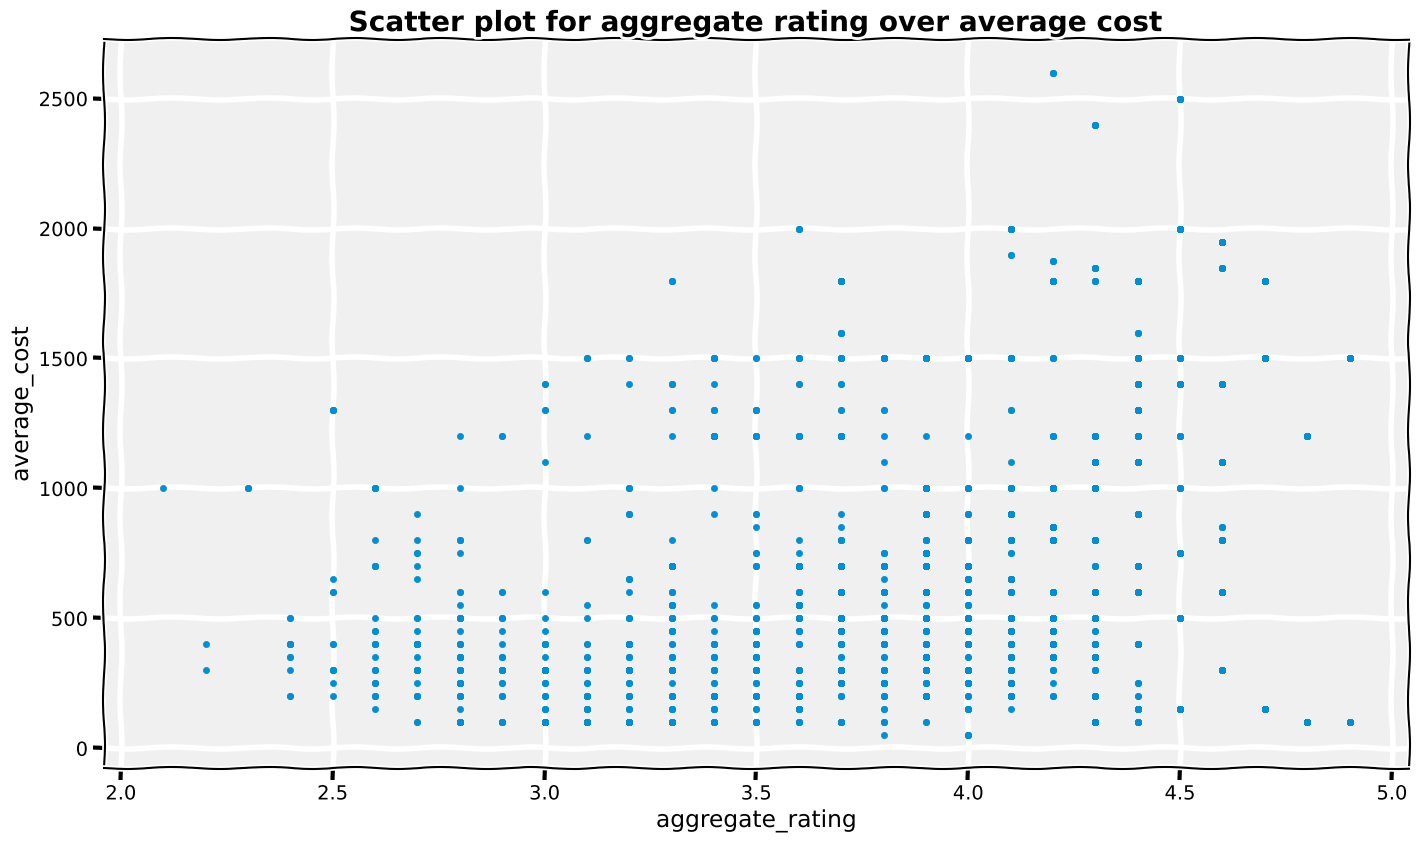

In [119]:
# votes vs rate
data.plot(figsize=(15,9), kind='scatter',x='aggregate_rating',y='average_cost',marker='o',grid=True)
plt.title('Scatter plot for aggregate rating over average cost',weight='bold');

Higher cost restaurants ( > 1500) tends to have higher ratings ( > 4).

## Aggregate Rating per Locality

/tmp/ipykernel_8357/1058230583.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['locality','rate_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' no

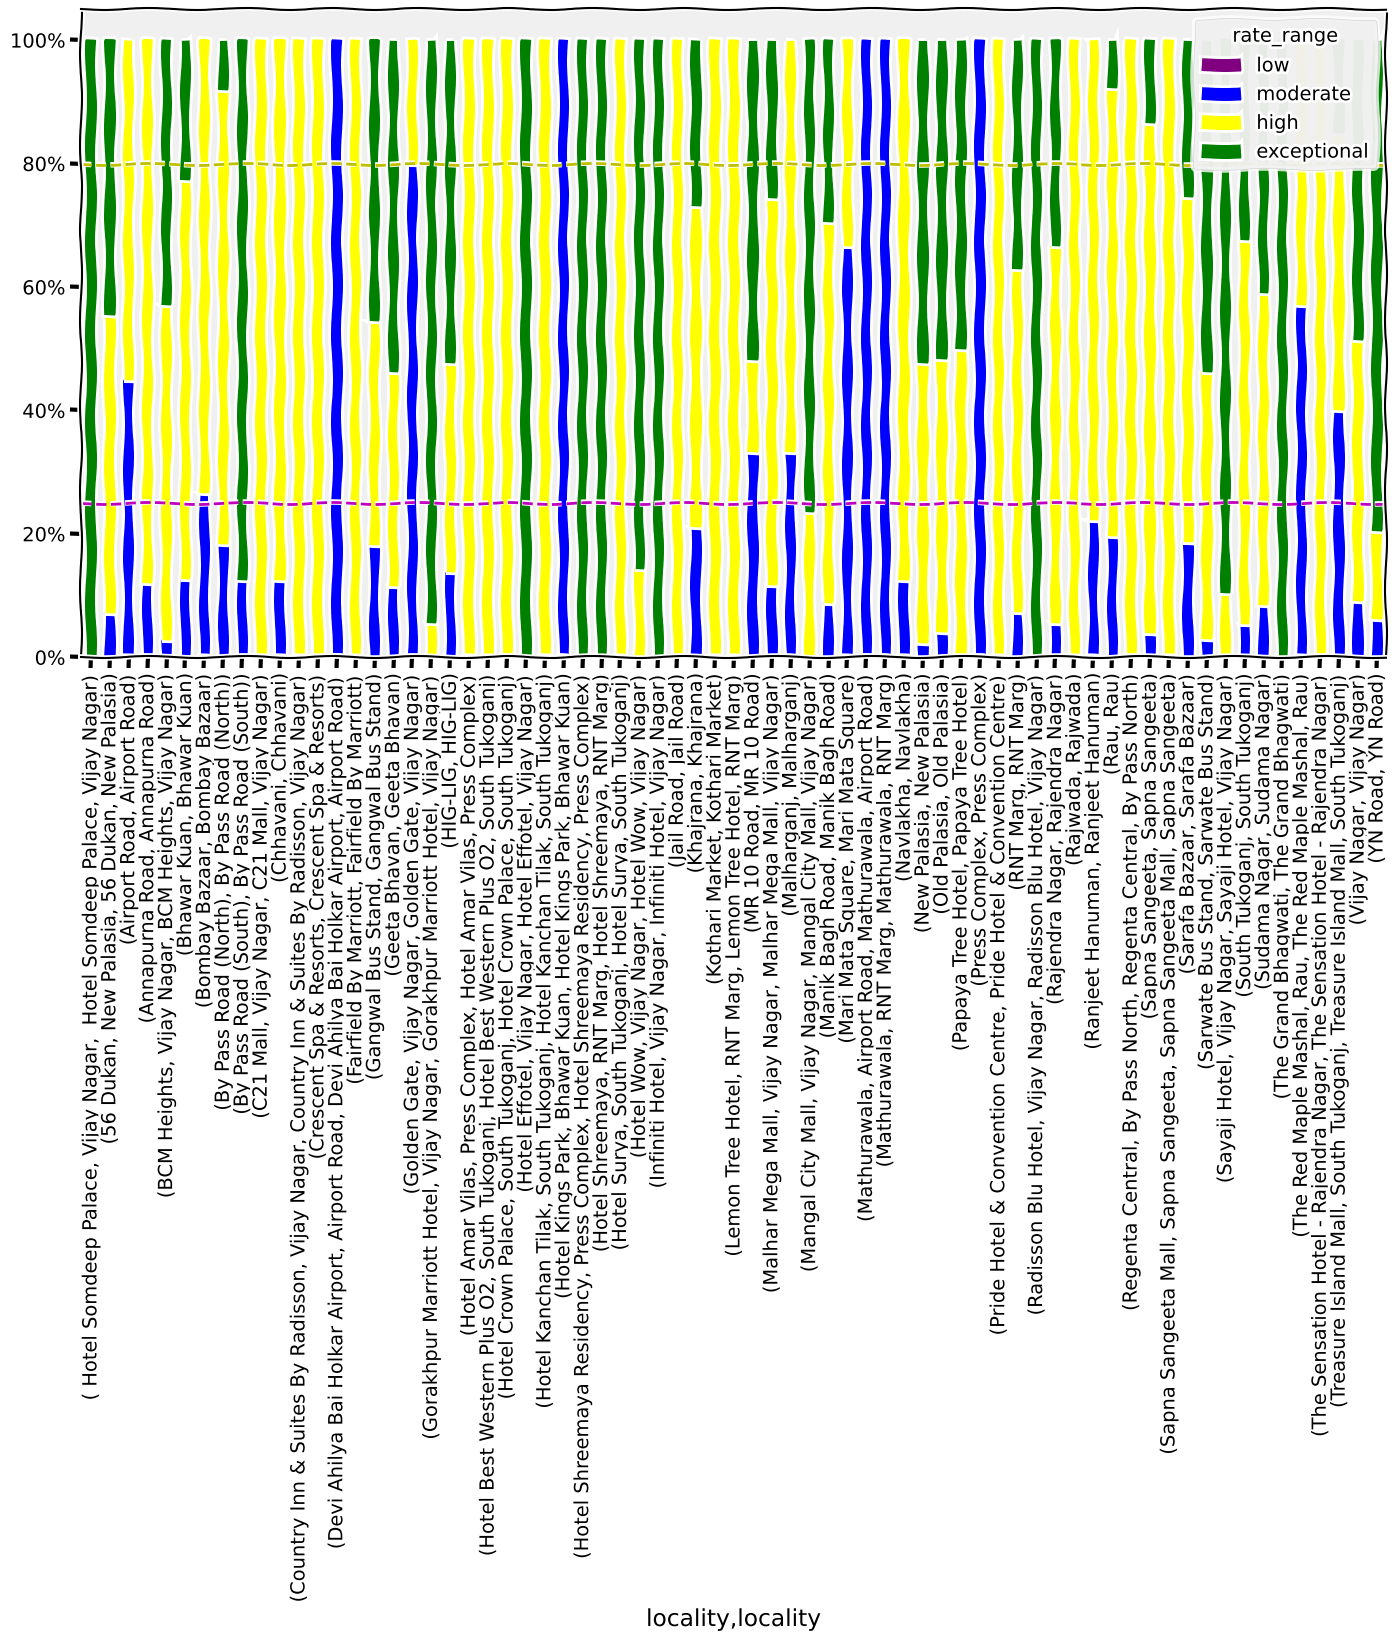

In [121]:
plt.rcParams['figure.figsize'] = 15,8;
data.groupby(['locality','rate_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['purple','blue','yellow','green','brown'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axhline(y =80 ,ls='--',color='y')
plt.axhline(y =25 ,ls='--',color='m');

Again here if you go through each color you will get the hint that.

Each locality has approximate rating like:


- **Vijay Nagar** and **RNT Marg** has highest number of **exceptional (4-5)** rated restaurants. But, it must also be considered that this localities also has highest number of restaurants.


- **Devi Ahilyabai Holkar Airport, RNT Marg, Bhawar Kaun** and **Press Complex**  has highest number of **high (3-4)** rated type restaurant in Gorakhpur.


- **Vijay Nagar, Jail Road, South Tukaganj, Kothari Market, Press Complex, Rajwada, Sapna Sangeeta Mall** and **Rajender Nagar** has highest number of **moderate (2-3)** rated type of restaurants. Localities like Vijay Nagar and Press Complex also has low rated restaurants, because as mentioned above, they have most number of restaurants.


- Suprisingly, there are no restaurants rated **low (1-2)** rated restaurants. This may also be dataset problem, with no low rated restaurant data.

### Cusine trend per Locality

In [122]:
loc_cuisine = data.groupby('locality')['cuisines'].value_counts().sort_values(ascending=False)
ind = loc_cuisine.index.levels[0]
top_cuisine , rest_count =[],[]
for i in ind:
    top_cuisine.append(loc_cuisine[i].index[0])
    rest_count.append(loc_cuisine[i][0])

/tmp/ipykernel_8357/4147111076.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rest_count.append(loc_cuisine[i][0])


In [123]:
# location's top cuisine
pd.DataFrame({'locality':ind,'top_cuisine':top_cuisine,'rest_count':rest_count})


locality  \
0      Hotel Somdeep Palace, Vijay Nagar   
1                  56 Dukan, New Palasia   
2                           Airport Road   
3                         Annapurna Road   
4               BCM Heights, Vijay Nagar   
..                                   ...   
64             The Red Maple Mashal, Rau   
65  The Sensation Hotel - Rajendra Nagar   
66  Treasure Island Mall, South Tukoganj   
67                           Vijay Nagar   
68                               YN Road   

                                      top_cuisine  rest_count  
0                           North Indian, Chinese          25  
1                                     Street Food          14  
2                                          Mithai           3  
3   Mithai, North Indian, South Indian, Beverages          11  
4                         Cafe, Fast Food, Bakery          15  
..                                            ...         ...  
64                    North Indian, Chinese, Cafe           3  
65                          North Indian, Chinese           1  
66   Burger, Fast Food, Beverages, Cafe, Desserts           3  
67                          North Indian, Chinese          40  
68        Cafe, Continental, Italian, Street Food          17  

[69 rows x 3 columns]

- We can see in the above table that  many neighbourhoods are characterised by certain type of cuisine.

In [124]:
del top_cuisine 
del rest_count

### Top Dish liked  per Locality

In [125]:
from collections import Counter
loc_dish = data.groupby('locality')['dish_liked'].value_counts()
ind = loc_dish.index.levels[0]
top_dish = []
for i in ind:
    dish_counter = Counter([e.strip() for e in ','.join(loc_dish[i].index).split(',') if e])
    top_dish.append(','.join(i[0] for i in dish_counter.most_common()[:1]))

In [126]:
# location's top dish
loc_dish_df = pd.DataFrame({'locality':ind,'top_dish':top_dish})
del top_dish
loc_dish_df[:20]

locality     top_dish
0               Hotel Somdeep Palace, Vijay Nagar      biryani
1                           56 Dukan, New Palasia      biryani
2                                    Airport Road      biryani
3                                  Annapurna Road      biryani
4                        BCM Heights, Vijay Nagar       coffee
5                                     Bhawar Kuan      biryani
6                                   Bombay Bazaar      biryani
7                            By Pass Road (North)      biryani
8                            By Pass Road (South)        rolls
9                           C21 Mall, Vijay Nagar        appam
10                                       Chhavani         roti
11  Country Inn & Suites By Radisson, Vijay Nagar       coffee
12                         Crescent Spa & Resorts        pizza
13   Devi Ahilya Bai Holkar Airport, Airport Road      churros
14                          Fairfield By Marriott  dal makhani
15                              Gangwal Bus Stand     shawarma
16                                   Geeta Bhavan        pizza
17                       Golden Gate, Vijay Nagar      biryani
18          Gorakhpur Marriott Hotel, Vijay Nagar      biryani
19                                        HIG-LIG      biryani

> It seems **Biryani** is the **most** liked dish in Gorakhpur!

###  Service types popular in Gorakhpur

<Axes: ylabel='count'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

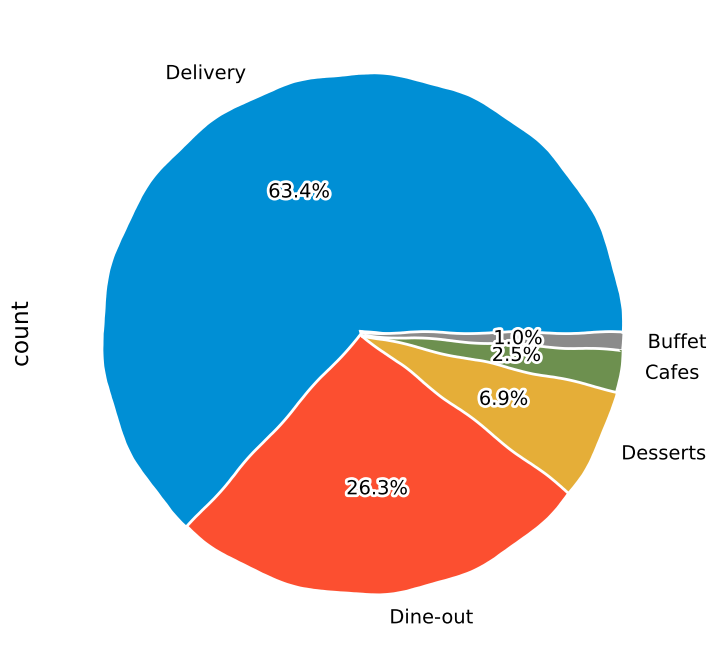

In [127]:
#check the restaurant service type

data.meal_type.value_counts().plot(kind = "pie", autopct='%.1f%%')

* Majority of restaurants (**~>60%**) provides an option of home **delivery**, as almost all restaurants listed on Zomato do provide **home delivery**.
* **~26%** of the restaurants listed on Zomato provides **Dine out** option

### Restaurant  Types popular in Gorakhpur

<Axes: ylabel='count'>

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

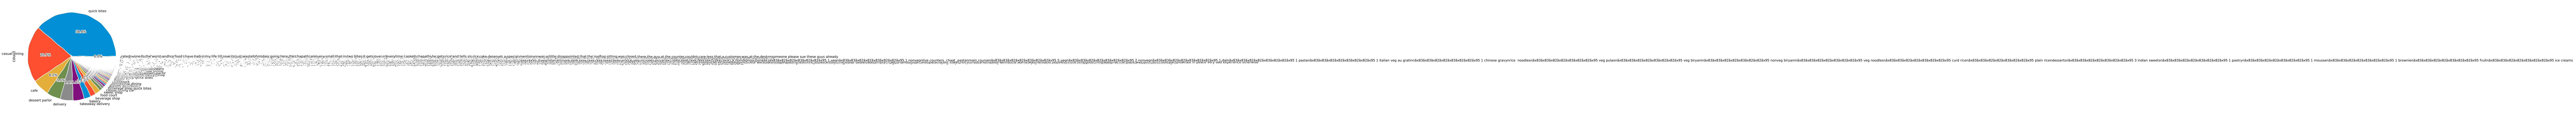

In [128]:
#plt.rcParams['figure.figsize'] = 15,9
clear_text_2pd('rest_type').value_counts().plot(kind = "pie", autopct='%.1f%%')

**Quick Bites** is most **popular** restaurant type in Gorakhpur (~ 40%), followed by **Causal Dining** (~ 21%).

###  How many  restaurants have online order service & book table service?

Text(0.5, 1.0, 'Restaurant service type')

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

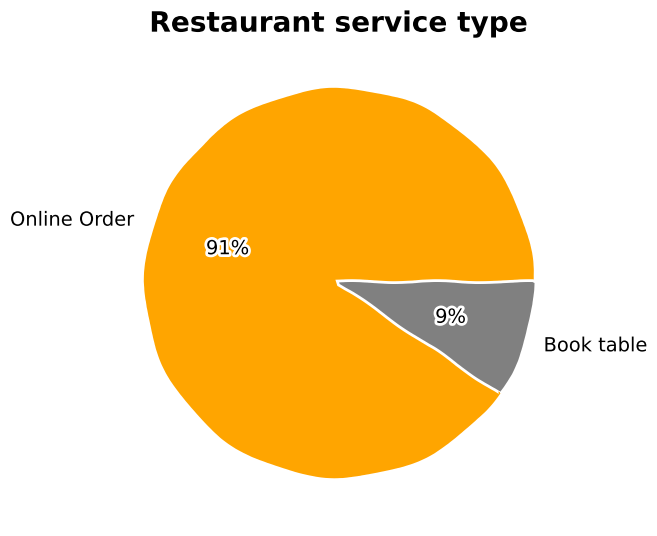

In [129]:
plt.rcParams['figure.figsize'] = 8,6
online_order= data[data['online_order']==True]['online_order'].count()
book_table= data[data['book_table']==True]['book_table'].count()

plt.pie([online_order,book_table],colors=colors, autopct='%1.0f%%', labels=['Online Order', 'Book table'])
# add white circle to male donut plot
#w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
#p.gca().add_artist(w_circle)
plt.title('Restaurant service type',weight ='bold')

> Its quiet clear that the **majority** of restaurants in our dataset has **online order** services but **minority** with **book table** service, which is may due to the nature of city or general **lifestyle** !

### How the online order service affects the restaurant rating?

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

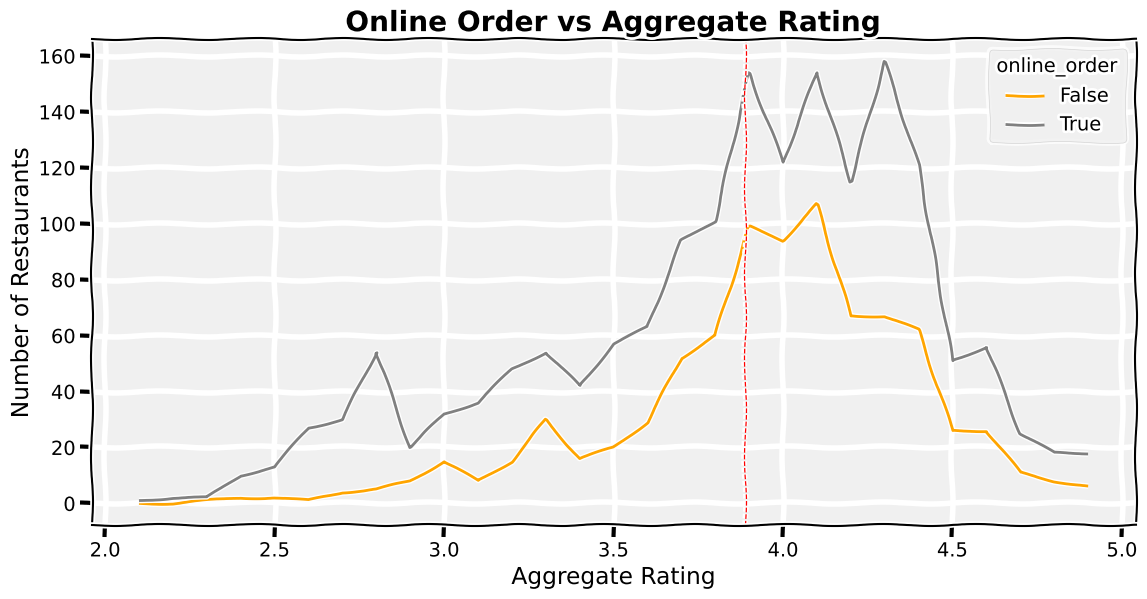

In [130]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,6
data_to_plot = pd.crosstab(data.aggregate_rating, data['online_order'])
data_to_plot.plot(grid= True,color=colors);
# set the average rate line
plt.axvline(data.aggregate_rating.mean(),color="r",linewidth=0.9,ls="--")
plt.title('Online Order vs Aggregate Rating',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Aggregate Rating');

As we notice from the above chart that having the online order service has some effect on rating the restaurants , such that we can found at the same level of rate there is higher number of restaurants that has online order service especially above the average rate of **3.7**.

### Which are some of the best restaurants providing ***online_order***?

In [131]:
avg_cost= data.average_cost.mean()
data.query('online_order == True & average_cost <= @avg_cost')[['name','aggregate_rating','average_cost','locality','votes']].\
sort_values(by=['aggregate_rating','average_cost','votes'],ascending=[False,True,False])[:20].drop_duplicates()

name  aggregate_rating  average_cost  \
198  Joshi Dahi Bada House               4.9         100.0   
195      Vijay Chaat House               4.8         100.0   
280     Naturals Ice Cream               4.7         150.0   

                  locality  votes  
198          Sarafa Bazaar  686.0  
195  56 Dukan, New Palasia  598.0  
280               RNT Marg  632.0

#### Answer:
In **Joshi Dahi Bada House** at Sarafa Bazaar, you can **order online** with highest aggregate rating of **4.9** for the **cheapest** average cost for 2 persons. 

**Vijay Chaat House** and **Naturals Ice Cream** 2nd and 3rd place respectively.

### How the book table service affects the restaurant rate?

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

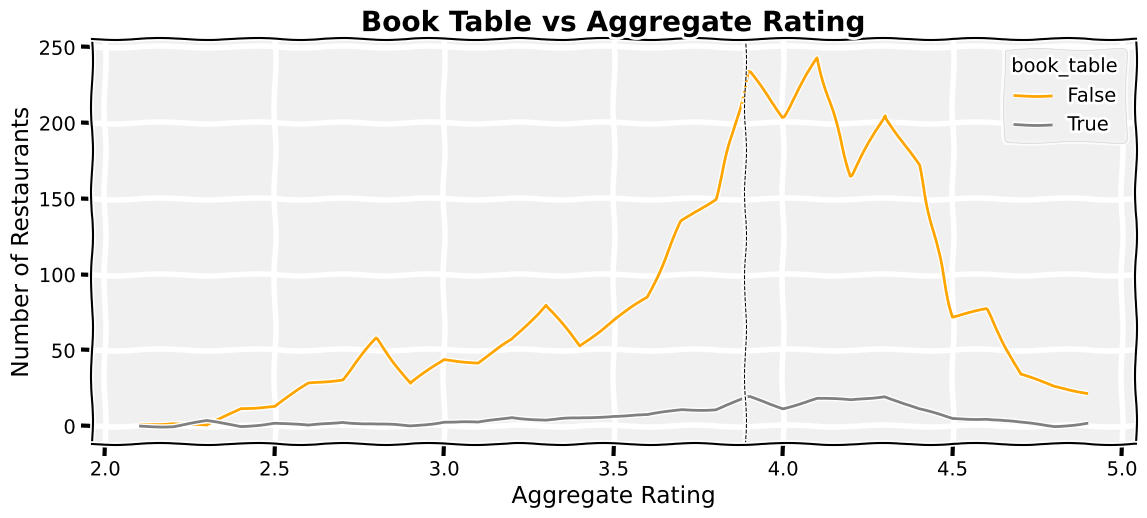

In [132]:
# collect the rate and online order columns
plt.rcParams['figure.figsize'] = 12,5
data_to_plot = pd.crosstab(data['aggregate_rating'], data['book_table'])
data_to_plot.plot(grid=True,color=colors);
# set the average rate line
plt.axvline(x=data.aggregate_rating.mean(),color="black",linewidth=0.75,ls="--")
plt.title('Book Table vs Aggregate Rating',weight='bold')
plt.ylabel('Number of Restaurants')
plt.xlabel('Aggregate Rating');

You can observe here that if your restaurant has no book table service you still have the opportunity to have a similar aggregate rating as other restaurants, that provide this service.
Most of the restaurant do not provide this service
- Note around **3.8** rating, we notice higher number of restaurants at this rate and provide book_table service

### Which are some of the best restaurants providing ***book_table*** service??

In [133]:
avg_cost= data.average_cost.mean()
data.query('book_table == True & average_cost <= @avg_cost')[['name','aggregate_rating','average_cost','votes','locality']].\
sort_values(by=['aggregate_rating','average_cost','votes'],ascending=[False,True,False])[:10].drop_duplicates()

name  aggregate_rating  average_cost  votes  \
2872  Joshi Dahi Bada House               4.9         100.0  686.0   
2611     Naturals Ice Cream               4.7         150.0  632.0   
2605  Shreemaya Celebration               4.6         600.0  782.0   
291     Shreemaya Celebrity               4.5         500.0  441.0   
2481         Mukki Ke Zayke               4.4         150.0  730.0   
618           Dilli Da Roll               4.4         400.0  569.0   
610    The Groundbaking Co.               4.4         600.0  505.0   
332            Ravi Alpahar               4.3         100.0  642.0   

                                      locality  
2872                             Sarafa Bazaar  
2611                                  RNT Marg  
2605                 Hotel Shreemaya, RNT Marg  
291   Hotel Shreemaya Residency, Press Complex  
2481                            Sapna Sangeeta  
618                                New Palasia  
610                                Vijay Nagar  
332                                Old Palasia

#### Answer:
Again, in **Joshi Dahi Bada House** at Sarafa Bazaar, you can **book_table** with highest aggregate rating of **4.9** for the **cheapest** average cost for 2 persons. 

**Naturals Ice Cream** and **Shreemaya Celebration** 2nd and 3rd place respectively.

### Average Rating according to restaurant service

In [134]:
# compare book_table average rate vs all rate
print(f'Average rate for all restaurants: {round(data.aggregate_rating.mean(),2)}')
print(f"Average rate for book_table service restaurants: {round(data.query('book_table == True')['aggregate_rating'].mean(),2)}")
print(f"Average rate for online_order service restaurants: {round(data.query('online_order == True')['aggregate_rating'].mean(),2)}")
print(f"Average rate for restaurants providing both book_table and online_order service: {round(data.query('online_order == True & book_table == True')['aggregate_rating'].mean(),2)}")

Average rate for all restaurants: 3.89
Average rate for book_table service restaurants: 3.9
Average rate for online_order service restaurants: 3.85
Average rate for restaurants providing both book_table and online_order service: 3.91


### Characteristics of restaurants with book_table service

In [135]:
# set averages of votes, rates and cost in case book_table service
data.query('book_table == True')[['votes','aggregate_rating','average_cost']].mean()

votes               606.607955
aggregate_rating      3.897727
average_cost        621.590909
dtype: float64

### Characteristics of restuarants with online_order service

In [136]:
# set averages of votes, rates and cost in case online_order service
data.query('online_order == True')[['votes','aggregate_rating','average_cost']].mean()

votes               490.780095
aggregate_rating      3.851073
average_cost        656.346841
dtype: float64

- We can see that average rating of book_table service restaurant is almost **similar** to online_order restaurant.
- Thus, its **not a very important parameter** for rating, cost or number of votes !

### What is the relation between cost and neighbouhood?

/tmp/ipykernel_8357/1041880409.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(['locality','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' no

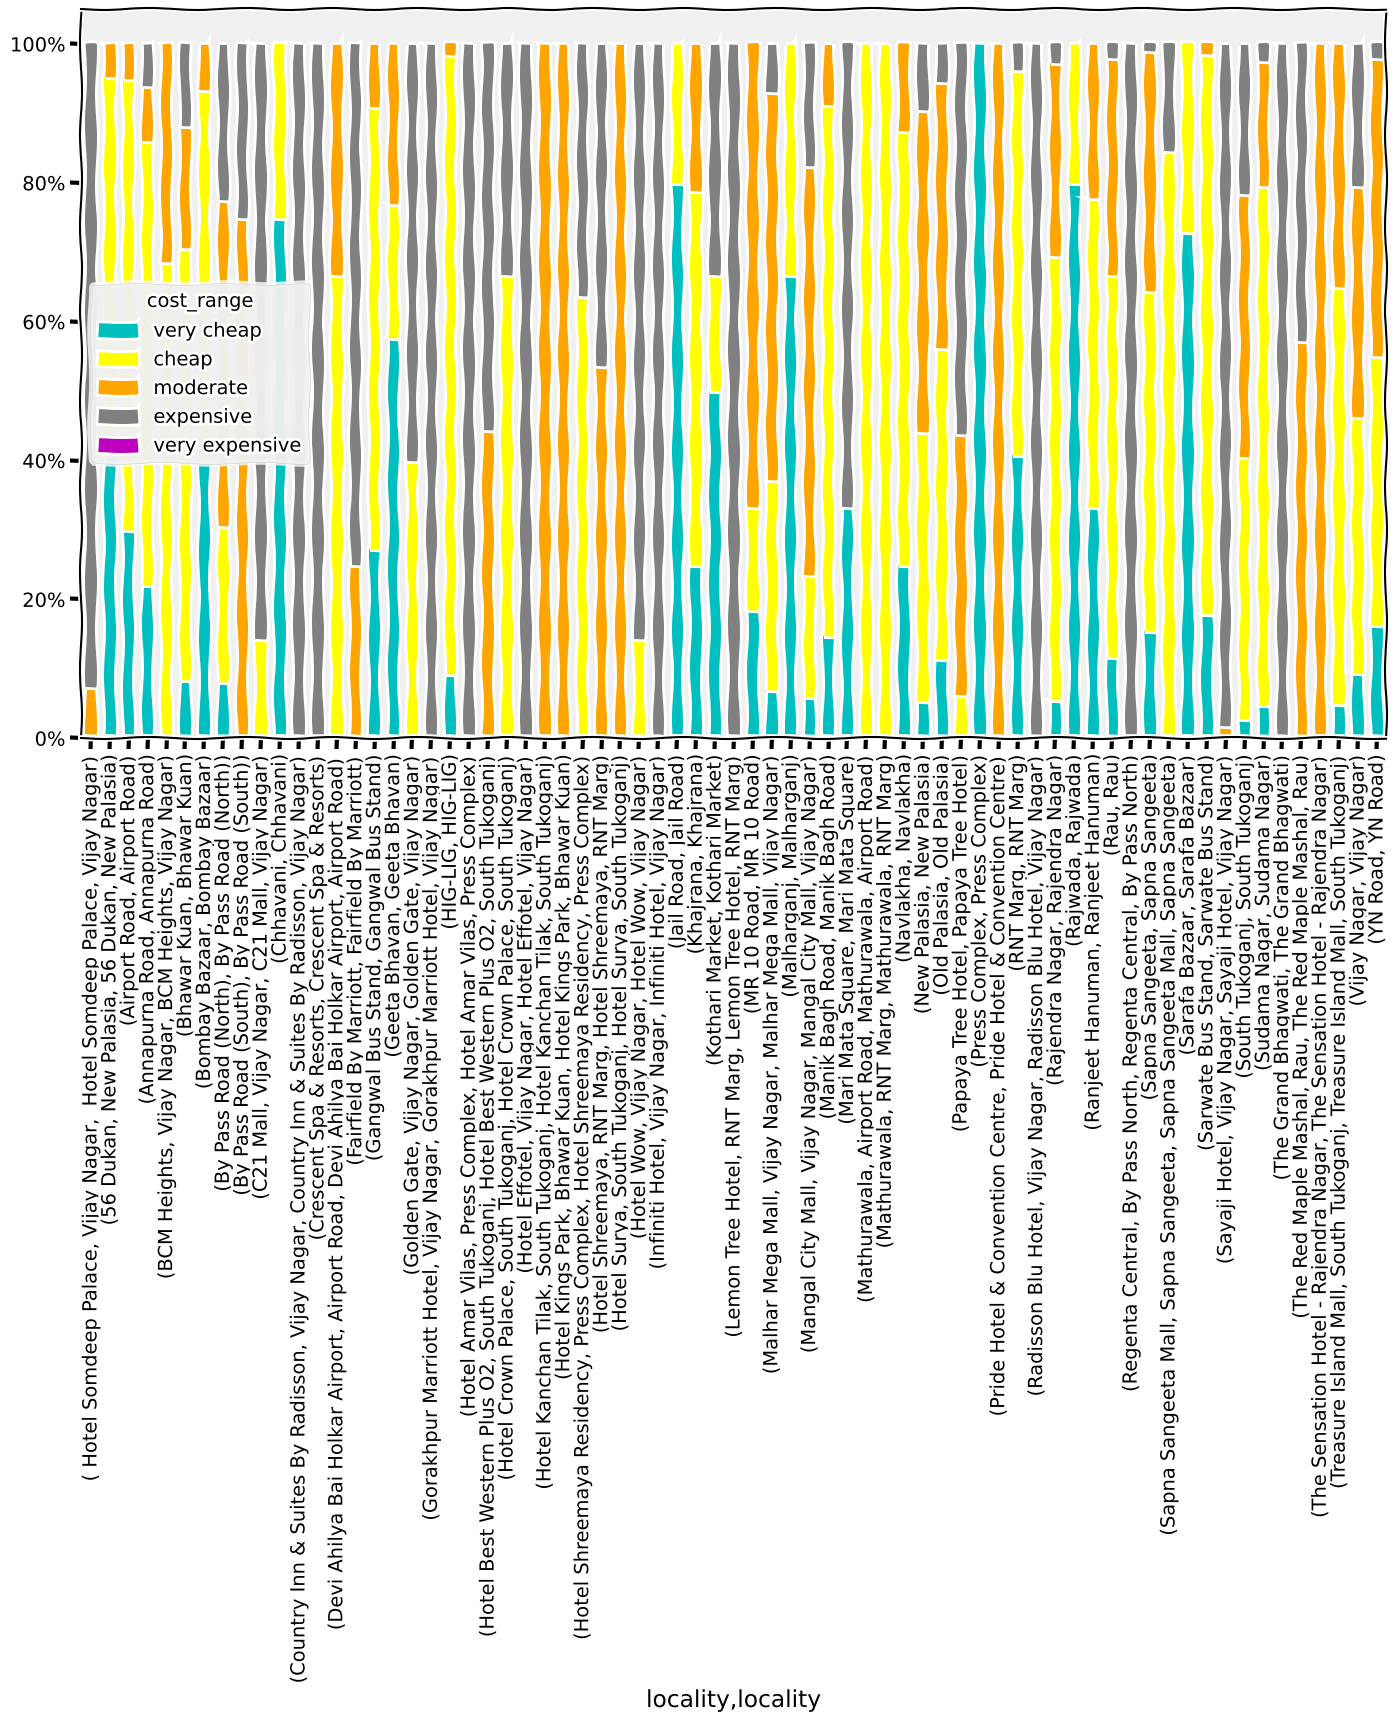

In [137]:
# location versus cost_range
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['locality','cost_range']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','yellow','orange','grey','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter());

In [138]:
# number of unique locations in our dataset
data.locality.nunique()

69

So crowded as we have **69** locations, but you can notice the following:

- **Vijay Nagar, RNT Marg, Crescent Spa & Resorts, Kothari Market, Regenta Central** and **Mari Mata Square** has some of the **expensive (1000-3000)** restaurants.

    
- **South Tukaganj, Bhawar Kuan, By Pass Road (South), The Red Maple Marshal Road** and **Rajender Nagar** has some of the **moderately (500-1000)** priced restaurants.   


- **HIG-LIG, Mathurawala, Sudama Nagar** and **Manik Marg Road** has some of the **cheapest (100-500)** restaurants.


- **Press Complex, Chhavani, Jail Road, Geeta Bhavan, Rajwada** and **Sarafa Bazaar** has some of the **very cheap (0-100)** restaurants.
    

Likely certain locations affected by the level of population hence the costing strategy differs

### What is the relation between meal_type and locality?

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

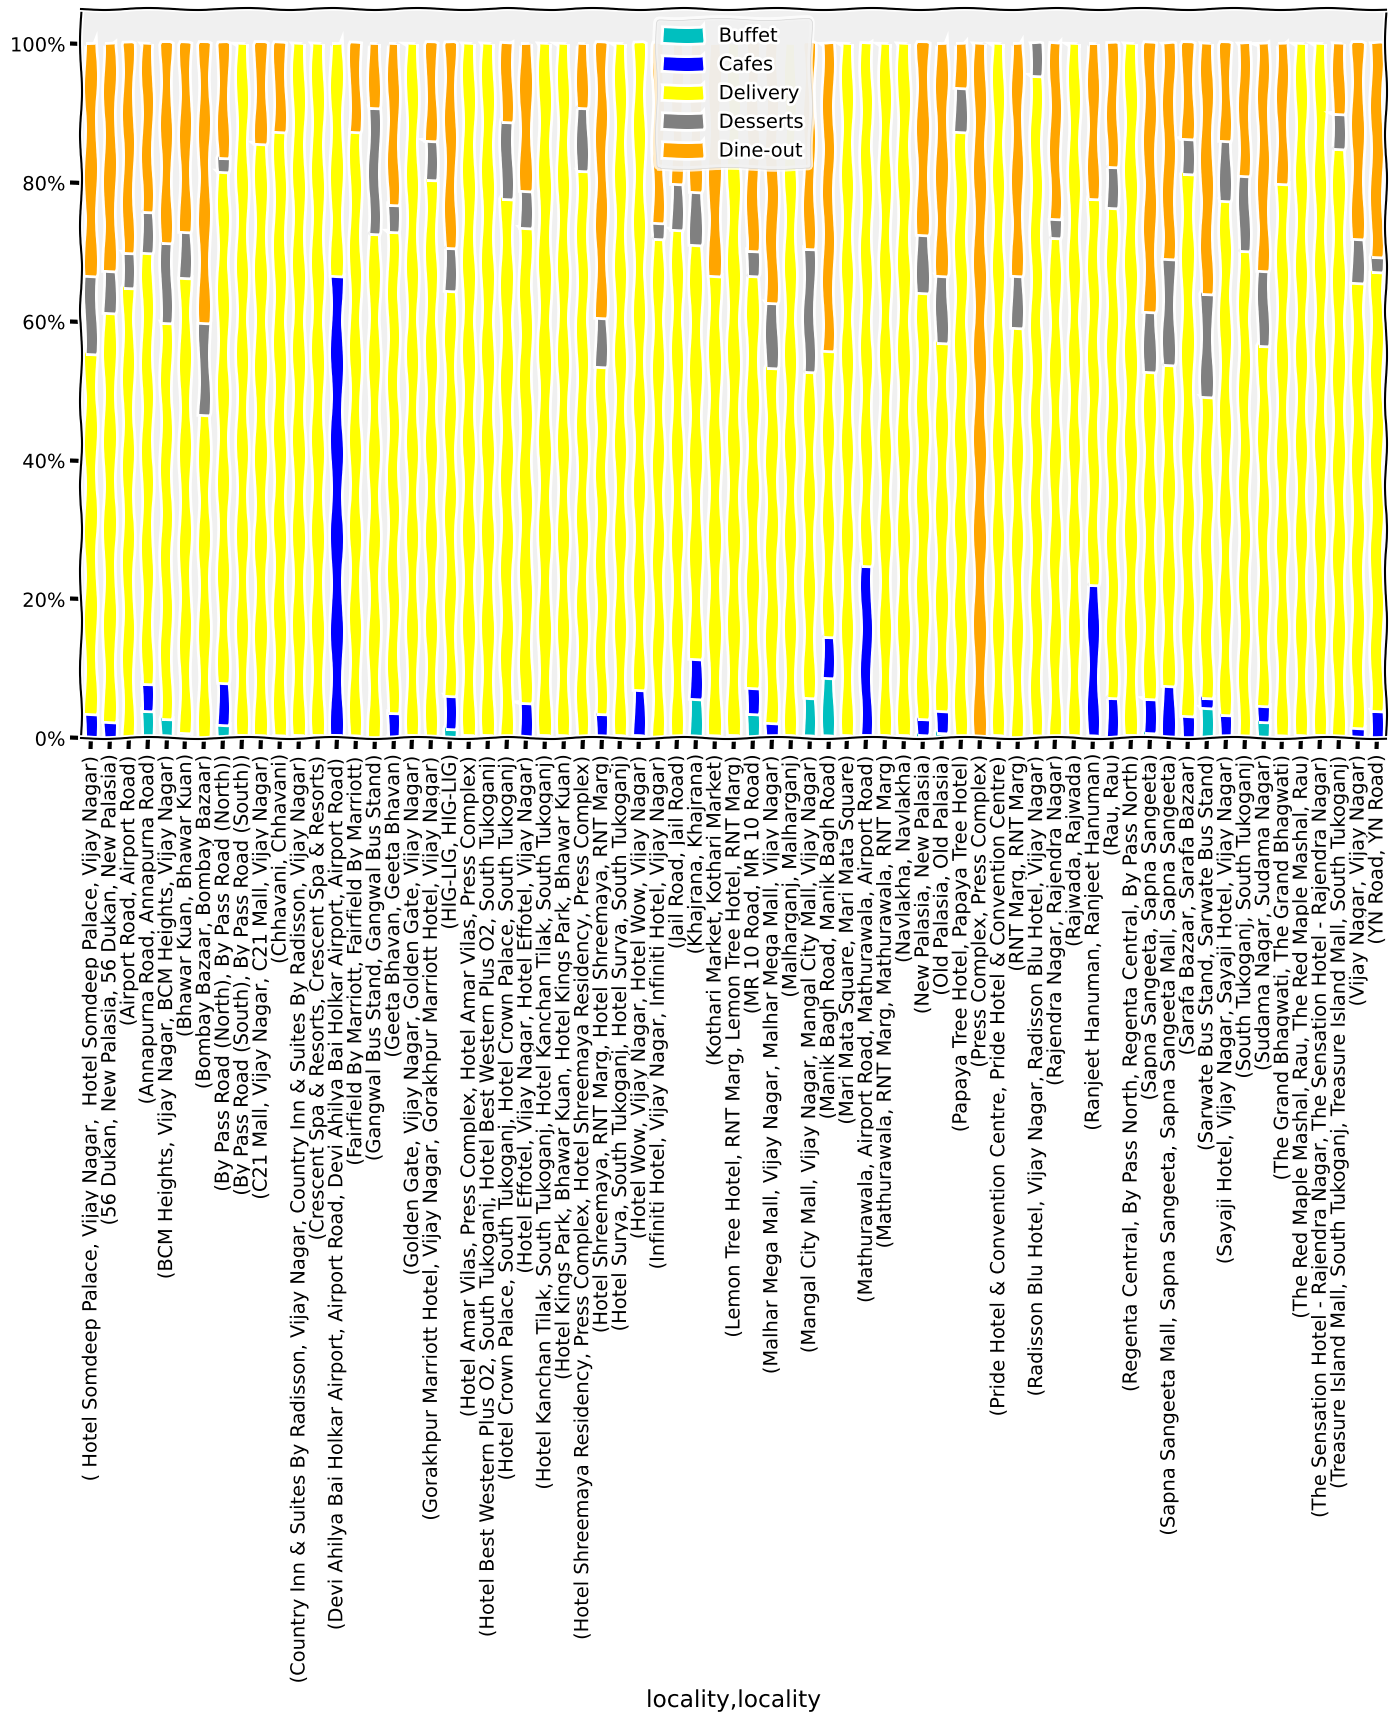

In [140]:
# location versus meal_type
plt.rcParams['figure.figsize'] = 15,9;
data.groupby(['locality','meal_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','b','yellow','grey','orange','black','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='best');

Again here if you go through each color you will get the hint that.

Each locality has preferred meal_type like:


- **Devi Ahilya Bai Holkar Airport** and **Mathurawala** at **Airport Road** and **Ranjeet Hanuman** has higher number of **cafes**


- **Red Maple Mashal, RNT Marg, Rajwada, Geeta Bhavan, Navlakha, South Tukaganj**  has highest number of **delivery** type restaurant in Gorakhpur.


- **Press Complex, Hotel Shreemaya, Bombay Bazaar, Hotel Somdeep Palace** has highest number of **dine-out** type.


- **Manik Bhag road, Khajrana, Annapurna road, Sudama Nagar** has highest number of **Buffer** type restaurants.

### What is the relation between meal type and the rating?

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
fin

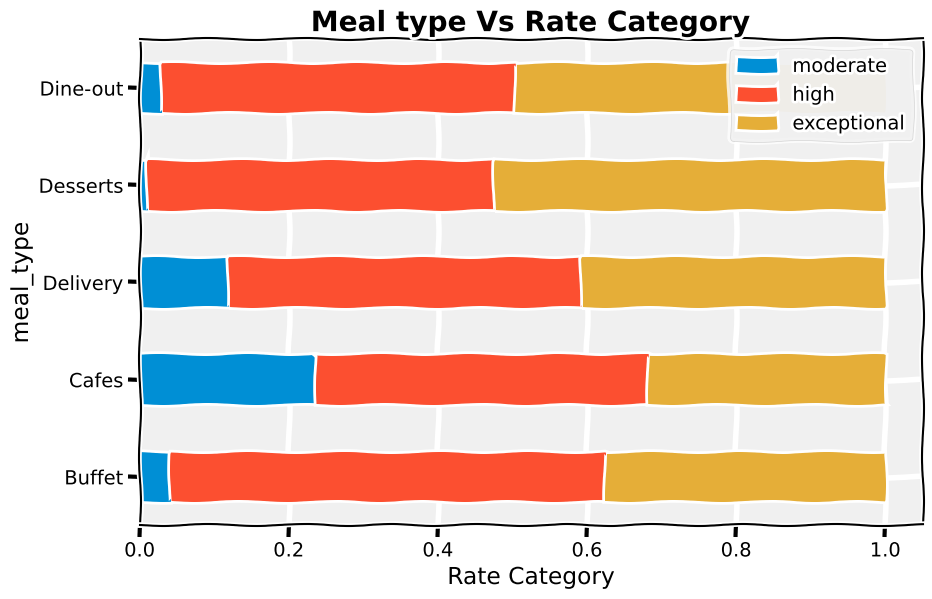

In [141]:
meal_to_rate = pd.crosstab(data['meal_type'], data['rate_range'])
plt.rcParams['figure.figsize'] = 9,6
meal_to_rate.div(meal_to_rate.sum(1).astype(float), axis = 0).plot(kind = 'barh', stacked = True, grid=True)
plt.legend(loc='best')
plt.xlabel('Rate Category')
plt.title('Meal type Vs Rate Category',weight='bold');

**Desserts** have highest number of **exceptional** rate category, with buffet with **highest** number of high rate category

## Best rated, most voted restaurants, irrespective of cost

This will be as:
- has the high aggregate_rating , > 4.5
- has the high number of votes as it will more reliable

In [143]:
data.query('aggregate_rating > 4.5')[['name','votes','aggregate_rating','average_cost','meal_type','locality']][:10].\
sort_values(by=['aggregate_rating','votes'],ascending=[False,False]).drop_duplicates()

name   votes  aggregate_rating  average_cost  \
22       Kebabsville - Sayaji Hotel  1346.0               4.9        1500.0   
17         The Cube - Hotel Effotel   518.0               4.8        1200.0   
56   Mustang - Hotel Somdeep Palace  1254.0               4.7        1500.0   
14          Cravings - Sayaji Hotel   658.0               4.7        1800.0   
44           Hobnob Gourmet Cafébar  1028.0               4.6        1950.0   
11     Sd 21 - Hotel Somdeep Palace   959.0               4.6        1100.0   
23            Shreemaya Celebration   782.0               4.6         600.0   
102     Ni Hao - Radisson Blu Hotel   248.0               4.6        1850.0   
79                   Chang'S Legacy   237.0               4.6         800.0   

    meal_type                            locality  
22      Cafes           Sayaji Hotel, Vijay Nagar  
17      Cafes          Hotel Effotel, Vijay Nagar  
56   Delivery   Hotel Somdeep Palace, Vijay Nagar  
14      Cafes           Sayaji Hotel, Vijay Nagar  
44   Delivery         Infiniti Hotel, Vijay Nagar  
11      Cafes   Hotel Somdeep Palace, Vijay Nagar  
23      Cafes           Hotel Shreemaya, RNT Marg  
102  Delivery     Radisson Blu Hotel, Vijay Nagar  
79   Delivery                         Vijay Nagar

##  Best restaurants in Gorakhpur ?

To answer this question let's first define the best restaurant:
This will be as:
- has the high rate , above average,
- has the high number of votes as it will more reliable
- has the low cost

In [144]:
# get the average votes & rate
avg_cost = data.average_cost.mean()
avg_rate = data.aggregate_rating.mean()

# get the more reliable and relevant datapoints those with high votes , high rates and from lowest possible price
rel_data = data.query('aggregate_rating >=@avg_rate & average_cost <= @avg_cost').sort_values(['aggregate_rating', 'votes', 'average_cost']\
                                                                           ,ascending=[False,False,True])
# the best list
rel_data[['name','aggregate_rating','votes','cuisines','average_cost','locality']][:10].drop_duplicates()

name  aggregate_rating  votes     cuisines  \
198  Joshi Dahi Bada House               4.9  686.0  Street Food   
195      Vijay Chaat House               4.8  598.0  Street Food   

     average_cost               locality  
198         100.0          Sarafa Bazaar  
195         100.0  56 Dukan, New Palasia

**Joshi Dahi Bada House** and **Vijay Chaat House** are the best **overall** restaurant in Gorakhpur !!

### Average cost at this overall best restaurants?

In [186]:
# average_price from the most reliable data
rel_data['average_cost'].mean()

390.8626560726447

The average price for most appreciated restaurants is around **~390** for **2 persons**

### Best **dessert** parlors in Gorakhpur

In [188]:
dessert_parlor=pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['rest_type_list']:
        if j.strip()== 'Dessert Parlor':
                dessert_parlor.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1
                
dessert_parlor[:10].drop_duplicates()

name aggregate_rating   votes  \
0     Naturals Ice Cream              4.7   632.0   
1  Shreemaya Celebration              4.6   782.0   
3                 Simi'S              4.6   440.0   
4    Shreemaya Celebrity              4.5   441.0   
6          Dilli Da Roll              4.4   569.0   
7                   Oiya              4.4   241.0   
8       Hotel Guru Kripa              4.3  3441.0   
9            Apna Sweets              4.3  2619.0   

                                            cuisines average_cost  \
0                                Desserts, Ice Cream        150.0   
1      Bakery, North Indian, South Indian, Fast Food        600.0   
3                                   Bakery, Desserts        300.0   
4  North Indian, South Indian, Italian, Chinese, ...        500.0   
6                                              Rolls        400.0   
7                                               Cafe        600.0   
8                                       North Indian        350.0   
9      Mithai, North Indian, South Indian, Beverages        400.0   

                                   locality  
0                                  RNT Marg  
1                 Hotel Shreemaya, RNT Marg  
3                               Vijay Nagar  
4  Hotel Shreemaya Residency, Press Complex  
6                               New Palasia  
7                               New Palasia  
8                         Sarwate Bus Stand  
9                               Vijay Nagar

### Best **Cafe's** in Gorakhpur

In [189]:
cafes=pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['rest_type_list']:
        if j.strip()== 'Cafe':
                cafes.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1
                
for index, row in cafes.iterrows():  
    if row['name'] in dessert_parlor[:10].name.to_list():
        cafes= cafes.drop(index)

cafes[:10].drop_duplicates()

name aggregate_rating   votes  \
0    Joshi Dahi Bada House              4.9   686.0   
4            Johny Hot Dog              4.5  1650.0   
5           Mukki Ke Zayke              4.4   730.0   
6     The Groundbaking Co.              4.4   505.0   
8   Atul Sandwich And Cafe              4.4   261.0   
14         Shree Gurukripa              4.3  2030.0   
16           Namo Sandwich              4.3   860.0   
17          Rasgulla House              4.3   829.0   

                         cuisines average_cost               locality  
0                     Street Food        100.0          Sarafa Bazaar  
4          Fast Food, Street Food        150.0  56 Dukan, New Palasia  
5                       Fast Food        150.0         Sapna Sangeeta  
6   Pizza, Continental, Beverages        600.0            Vijay Nagar  
8                       Fast Food        200.0            Old Palasia  
14                   North Indian        350.0      Sarwate Bus Stand  
16                      Fast Food        500.0           Sudama Nagar  
17                         Mithai        100.0           Geeta Bhavan

### Best **bakeries** in Gorakhpur

In [190]:
bakeries=pd.DataFrame(columns=['name','aggregate_rating','votes','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['rest_type_list']:
        if j.strip()== 'Bakery':
                bakeries.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','average_cost','locality']]
                x=x+1

bakeries[:5].drop_duplicates()

name aggregate_rating  votes average_cost  \
0               Simi'S              4.6  440.0        300.0   
2  Shreemaya Celebrity              4.5  441.0        500.0   
3    Vijay Chaat House              4.4  613.0        100.0   
4                 Oiya              4.4  241.0        600.0   

                                   locality  
0                               Vijay Nagar  
2  Hotel Shreemaya Residency, Press Complex  
3                             Sarafa Bazaar  
4                               New Palasia

### Best **dine-outs** in Gorakhpur

In [191]:
casual_dining=pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['rest_type_list']:
        if j.strip()== 'Casual Dining':
                casual_dining.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1

for index, row in casual_dining.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list():
        casual_dining= casual_dining.drop(index)
    
casual_dining[:20].drop_duplicates()

name aggregate_rating  votes  \
2                Vijay Chaat House              4.8  598.0   
20               Vijay Chaat House              4.4  613.0   
49                    Ravi Alpahar              4.3  642.0   
54   Mitti - Organic. Fresh. Desi.              4.3  590.0   
59                  Pleasure House              4.3  504.0   
66                    Cakes & More              4.3  253.0   
67  Chef Lucky'S Paratha On Wheels              4.3  225.0   
68                    Fork It Cafe              4.3  138.0   

                            cuisines average_cost               locality  
2                        Street Food        100.0  56 Dukan, New Palasia  
20                       Street Food        100.0          Sarafa Bazaar  
49                       Street Food        100.0            Old Palasia  
54                Cafe, North Indian        600.0            Old Palasia  
59                   Cafe, Fast Food        500.0            Bhawar Kuan  
66                  Bakery, Desserts        350.0            New Palasia  
67  North Indian, Fast Food, Biryani        450.0            Old Palasia  
68                   Cafe, Fast Food        600.0   By Pass Road (South)

### Best Sweet shops in Gorakhpur

In [192]:
sweet_shops=pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['rest_type_list']:
        if j.strip()== 'Sweet Shop':
                sweet_shops.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1
                
for index, row in sweet_shops.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list() or row['name'] in casual_dining[:10].name.to_list():
        sweet_shops= sweet_shops.drop(index)                

sweet_shops[:10].drop_duplicates()

name aggregate_rating  votes  \
3      Tea Shack              4.2  722.0   
5   Bake N Shake              4.2  683.0   
6         Faasos              4.2  565.0   
7         Faasos              4.2  326.0   
8    Hotel Zakir              4.1  738.0   
9      Cafe Yolo              4.1  692.0   
10    Chai Kaapi              4.1  389.0   
11   Sam'S Momos              4.0  382.0   
12  Gordhan Thal              3.9  432.0   

                                          cuisines average_cost  \
3                               Fast Food, Italian        450.0   
5                          Cafe, Fast Food, Bakery        500.0   
6   Fast Food, North Indian, Biryani, Rolls, Wraps        600.0   
7   Fast Food, North Indian, Biryani, Rolls, Wraps        600.0   
8                                     North Indian        300.0   
9                                  Cafe, Fast Food        650.0   
10                       Fast Food, Beverages, Tea        350.0   
11  Momos, Chinese, Rolls, North Indian, Fast Food        500.0   
12                                        Gujarati        600.0   

                         locality  
3                     Vijay Nagar  
5        BCM Heights, Vijay Nagar  
6                     Old Palasia  
7   Mangal City Mall, Vijay Nagar  
8                        Khajrana  
9                     Vijay Nagar  
10                    Old Palasia  
11          56 Dukan, New Palasia  
12                   Geeta Bhavan

### Best **North Indian** restaurants in Gorakhpur

In [193]:
north_indian=pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'North Indian':
                north_indian.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1

for index, row in north_indian.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in sweet_shops[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list() or row['name'] in casual_dining[:10].name.to_list():
        north_indian= north_indian.drop(index)                 
                
north_indian[:50].drop_duplicates()

name aggregate_rating   votes  \
22                   Veera Di Hatti              4.4   476.0   
59    Mitti - Organic. Fresh. Desi.              4.3   590.0   
89   Chef Lucky'S Paratha On Wheels              4.3   225.0   
91                      99 Rotiwala              4.2  2517.0   
121                       Oye Pappe              4.2   502.0   
128                       Oye Pappe              4.2   311.0   
131                     Sagar Gaire              4.1  2932.0   
142                           Oye24              4.1  1460.0   

                                  cuisines average_cost               locality  
22                            North Indian        250.0         Sapna Sangeeta  
59                      Cafe, North Indian        600.0            Old Palasia  
89        North Indian, Fast Food, Biryani        450.0            Old Palasia  
91                            North Indian        500.0                HIG-LIG  
121                North Indian, Fast Food        350.0            Bhawar Kuan  
128              North Indian, Street Food        450.0  56 Dukan, New Palasia  
131  South Indian, North Indian, Fast Food        450.0            New Palasia  
142                  North Indian, Chinese        250.0                HIG-LIG

### Best **South Indian** restaurants in Gorakhpur

In [194]:
south_indian =pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'South Indian':
                south_indian.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1
                
for index, row in south_indian.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in north_indian[:10].name.to_list() or row['name'] in sweet_shops[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list() or row['name'] in casual_dining[:10].name.to_list():
        south_indian= south_indian.drop(index)                 

south_indian[:30].drop_duplicates()

name aggregate_rating   votes  \
61                Sagar Gaire              4.1  2932.0   
72               Maa Ki Rasoi              4.1   541.0   
84                 Cafe Udipi              4.1   158.0   
96   Sharma Namkeen Mithaiyan              4.0   418.0   
98         Ramesh Masala Dosa              4.0   275.0   
100               Romba South              4.0   218.0   

                                              cuisines average_cost  \
61               South Indian, North Indian, Fast Food        450.0   
72                          North Indian, South Indian        450.0   
84                                        South Indian        250.0   
96   North Indian, Chinese, South Indian, Street Fo...        200.0   
98                                        South Indian        150.0   
100                               Andhra, South Indian        600.0   

                  locality  
61             New Palasia  
72            Sudama Nagar  
84             Old Palasia  
96             Vijay Nagar  
98   56 Dukan, New Palasia  
100            Vijay Nagar

### Best **Fast- food** restaurants in Gorakhpur

In [195]:
fast_food =pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'Fast Food' or j.strip()== 'Burger' or j.strip()== 'Pizza' or j.strip()== 'Momos' or j.strip()== 'Street Food' or j.strip()== 'Rolls':
                fast_food.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1

fast_food[:50].drop_duplicates()

name aggregate_rating   votes  \
0   Joshi Dahi Bada House              4.9   686.0   
7       Vijay Chaat House              4.8   598.0   
20  Shreemaya Celebration              4.6   782.0   
35          Johny Hot Dog              4.5  1650.0   

                                         cuisines average_cost  \
0                                     Street Food        100.0   
7                                     Street Food        100.0   
20  Bakery, North Indian, South Indian, Fast Food        600.0   
35                         Fast Food, Street Food        150.0   

                     locality  
0               Sarafa Bazaar  
7       56 Dukan, New Palasia  
20  Hotel Shreemaya, RNT Marg  
35      56 Dukan, New Palasia

### Best **Continental** restaurants in Gorakhpur

In [196]:
continental =pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'Continental':
                continental.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1

continental[:50].drop_duplicates()

name aggregate_rating  votes  \
0        The Groundbaking Co.              4.4  505.0   
9   Anand Shree Fruit Bonanza              4.0  133.0   
10                  Meals Lab              3.9  155.0   

                                           cuisines average_cost  \
0                     Pizza, Continental, Beverages        600.0   
9   South Indian, Chinese, Continental, Street Food        400.0   
10               North Indian, Chinese, Continental        500.0   

          locality  
0      Vijay Nagar  
9      Vijay Nagar  
10  Annapurna Road

### Best **Chinese** restaurants in Gorakhpur

In [197]:
chinese =pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'Chinese':
                chinese.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1

for index, row in chinese.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in north_indian[:10].name.to_list() or row['name'] in sweet_shops[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list() or row['name'] in casual_dining[:10].name.to_list():
        chinese= chinese.drop(index)                  

chinese[:30].drop_duplicates()

name aggregate_rating   votes  \
12                  Oye24              4.1  1460.0   
20                    Jmb              4.1   489.0   
29  Old Kolkata Roll Club              4.1   458.0   
35      Shiva Chinese Wok              4.1   412.0   
39      Nom! Nom! Chinese              4.1   367.0   

                        cuisines average_cost         locality  
12         North Indian, Chinese        250.0          HIG-LIG  
20  Chinese, Fast Food, Desserts        400.0  Manik Bagh Road  
29                Chinese, Rolls        250.0      New Palasia  
35            Chinese, Fast Food        300.0      Old Palasia  
39              Chinese, Seafood        600.0      Vijay Nagar

### Best **Italian** restaurants in Gorakhpur

In [198]:
italian =pd.DataFrame(columns=['name','aggregate_rating','votes','cuisines','average_cost','locality'])
x=0

for index, row in rel_data.iterrows():
    for j in row['cuisines_list']:
        if j.strip()== 'Italian':
                italian.loc[x] =rel_data.loc[index,['name','aggregate_rating','votes','cuisines','average_cost','locality']]
                x=x+1
                
for index, row in italian.iterrows():  
    if row['name'] in cafes[:10].name.to_list() or row['name'] in north_indian[:10].name.to_list() or row['name'] in sweet_shops[:10].name.to_list() or row['name'] in dessert_parlor[:10].name.to_list() or row['name'] in casual_dining[:10].name.to_list():
        italian= italian.drop(index)                

italian[:50].drop_duplicates()

name aggregate_rating  votes  \
31    Leaves & Loafs Cafe & Bakery              4.0  195.0   
32  Sigdi - Sizzler & South Indian              3.9  196.0   

                                             cuisines average_cost  \
31  North Indian, Chinese, Italian, Healthy Food, ...        500.0   
32                     South Indian, Chinese, Italian        600.0   

       locality  
31  Vijay Nagar  
32  Vijay Nagar

Seems like **Shreemaya Celebrity** is one of the best and few restaurants with international cuisines 

## HeatMaps

In [199]:
def generateBaseMap(default_location=[22.71, 75.85], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

### Heatmap for density of restaurants in Gorakhpur

In [211]:
# Create latitude and longitude dictionaries
lat = {}
lon = {}

# Count the number of restaurants in each locality
Rest_locations = data['locality'].value_counts().reset_index()
Rest_locations.columns = ['locality', 'count']

# Iterate through the original DataFrame to collect latitude and longitude for each locality
for index, row in data.iterrows():
    if row['locality'] in Rest_locations['locality'].tolist():
        lat[row['locality']] = row['latitude']
        lon[row['locality']] = row['longitude']

# Add latitude and longitude to Rest_locations DataFrame
Rest_locations['latitude'] = pd.Series(lat)
Rest_locations['longitude'] = pd.Series(lon)

# Remove rows with NaN values in latitude or longitude
Rest_locations = Rest_locations.dropna(subset=['latitude', 'longitude'])

# Generate base map (you need to define generateBaseMap() function)
basemap = generateBaseMap()

# Ensure latitude and longitude columns are in correct order for HeatMap
Rest_locations = Rest_locations[['latitude', 'longitude', 'count']]

# Convert DataFrame to list of lists (required format for HeatMap)
heatmap_data = Rest_locations.values.tolist()

# Create HeatMap layer using latitude, longitude, and count of restaurants
HeatMap(heatmap_data, zoom=20, radius=16).add_to(basemap)

# Display the map
basemap

In [201]:
Rest_locations

locality  count  \
locality                                                                  
Vijay Nagar                                          Vijay Nagar    514   
Old Palasia                                          Old Palasia    219   
New Palasia                                          New Palasia    168   
Bhawar Kuan                                          Bhawar Kuan    119   
Sapna Sangeeta                                    Sapna Sangeeta    104   
...                                                          ...    ...   
Hotel Surya, South Tukoganj          Hotel Surya, South Tukoganj      1   
Hotel Kings Park, Bhawar Kuan      Hotel Kings Park, Bhawar Kuan      1   
Press Complex                                      Press Complex      1   
Mathurawala, RNT Marg                      Mathurawala, RNT Marg      1   
Pride Hotel & Convention Centre  Pride Hotel & Convention Centre      1   

                                  latitude  longitude  
locality                                               
Vijay Nagar                      22.762692  75.882301  
Old Palasia                      22.725690  75.887858  
New Palasia                      22.726544  75.880074  
Bhawar Kuan                      22.695474  75.866073  
Sapna Sangeeta                   22.701548  75.862741  
...                                    ...        ...  
Hotel Surya, South Tukoganj      22.718406  75.876452  
Hotel Kings Park, Bhawar Kuan    22.689421  75.863597  
Press Complex                    22.738665  75.891789  
Mathurawala, RNT Marg            22.708468  75.875814  
Pride Hotel & Convention Centre  22.706944  75.928949  

[69 rows x 4 columns]

# Word Analysis

## Customer reviews

In [ ]:
text = ' '.join(data.reviews_text)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
 
comment_words = ' '
stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 1000, height = 1000, 
                background_color ='white', 
                stopwords = stopwords).generate(text) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

## Word Cloud of dish_liked by restaurant_type

In [ ]:
data['dish_liked']=data['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
#x=df.groupby('rest_type',as_index=False)['dish_liked'].agg('sum')
#x['dish_liked']=x['dish_liked'].apply(lambda x : list(filter(lambda a : a!='',x)))

In [203]:
rest=rel_data['rest_type'].value_counts()[:9].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=data[data['rest_type']==r]['dish_liked'].values.tolist()
        corpus=','.join(x  for list_words in corpus for x in list_words)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,
                      width=1000, height=1000).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")

## WordCloud of Reviews by locality

In [204]:
rating_df=pd.DataFrame(data,columns=['locality','aggregate_rating','reviews_text'])
rating_df['reviews_text']=rating_df['reviews_text'].apply(lambda x : re.sub('[^a-zA-Z0-9\s]',"",x))

In [ ]:
rating_df.head()

In [205]:
rest=data['locality'].value_counts()[:6].index
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,r in enumerate(rest):
        plt.subplot(3,3,i+1)
        corpus=rating_df[rating_df['locality']==r]['reviews_text'].values.tolist()
        corpus=' '.join(x  for x in corpus)
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,
                      width=1000, height=1000).generate(corpus)
        plt.imshow(wordcloud)
        plt.title(r)
        plt.axis("off")

In [214]:
# Function to generate WordCloud
def produce_wordcloud(rest):
    stopwords_set = set(stopwords.words('english'))  # Load English stopwords from NLTK
    
    # Assuming 'rating_df' is your DataFrame containing restaurant reviews
    corpus = rating_df[rating_df['locality'] == rest]['reviews_text'].values.tolist()
    corpus = ' '.join(x for x in corpus)
    
    wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                          stopwords=stopwords_set, width=1000, height=1000).generate(corpus)
    
    plt.imshow(wordcloud)
    plt.title(rest)
    plt.axis("off")  # Turn off axis numbers
    plt.show()

## Sentiment Analysis of customer reviews

In [207]:
def sentiment_scores(sentence): 

    sid_obj = SentimentIntensityAnalyzer() 
 
    sentiment_dict = sid_obj.polarity_scores(sentence) 

    #print("Overall sentiment dictionary is : ", sentiment_dict) 
    print("Review rated as ", round(sentiment_dict['neg']*100 ,2), "% Negative") 
    print("Review rated as ", round(sentiment_dict['neu']*100 ,2), "% Neutral") 
    print("Review rated as ", round(sentiment_dict['pos']*100 ,2), "% Positive") 

    print("\n Overall Rating: ", end = " ") 
    #print(max(sentiment_dict), sentiment_dict[max(sentiment_dict)])

    # decide sentiment as positive, negative and neutral 
    if max(sentiment_dict)== 'pos' : 
        print("Positive") 

    elif max(sentiment_dict)== 'neg' : 
        print("Negative") 

    elif max(sentiment_dict)=='neu' : 
        print("Neutral") 


### Sentiment Analysis of reviews by restaurant_type

In [149]:
# Types of restaurants

sentiment_rest=data['rest_type'].value_counts()[:10].index
sentiment_rest

Index(['Quick Bites', 'Casual Dining', 'Cafe', 'Dessert Parlor', 'Delivery',
       'Takeaway, Delivery', 'Bakery', 'Beverage Shop', 'Food Court',
       'Sweet Shop'],
      dtype='object', name='rest_type')

In [150]:
def sentiment_analysis_review_rest(rest):

    for i,r in enumerate(rest):
        reviews_rest =data[data['rest_type']==r]['reviews_text'].values.tolist()
        print('\n\n',r)
        sentiment_scores(reviews_rest[:100])

In [151]:
sentiment_analysis_review_rest(sentiment_rest) 



 Quick Bites
Review rated as  5.5 % Negative
Review rated as  73.5 % Neutral
Review rated as  21.0 % Positive

 Overall Rating:  Positive


 Casual Dining
Review rated as  4.1 % Negative
Review rated as  72.6 % Neutral
Review rated as  23.3 % Positive

 Overall Rating:  Positive


 Cafe
Review rated as  4.4 % Negative
Review rated as  70.4 % Neutral
Review rated as  25.1 % Positive

 Overall Rating:  Positive


 Dessert Parlor
Review rated as  4.8 % Negative
Review rated as  72.8 % Neutral
Review rated as  22.4 % Positive

 Overall Rating:  Positive


 Delivery
Review rated as  5.6 % Negative
Review rated as  69.9 % Neutral
Review rated as  24.6 % Positive

 Overall Rating:  Positive


 Takeaway, Delivery
Review rated as  6.9 % Negative
Review rated as  71.5 % Neutral
Review rated as  21.6 % Positive

 Overall Rating:  Positive


 Bakery
Review rated as  5.4 % Negative
Review rated as  70.9 % Neutral
Review rated as  23.6 % Positive

 Overall Rating:  Positive


 Beverage Shop
Review

All of the **sentiment rating** of customer reviews according to **restaurant type** are **positive** with mean positive sentiment rating of all types of restaurant **~23 %**

**Highest positive** sentiment rating is **beverage** type with **26.4 %**.

**Highest negative** sentiment rating is **takeaway** type with **6.9 %**.

### Sentiment Analysis of reviews by locality

In [152]:
sentiment_locality=data['locality'].value_counts()[:10].index
sentiment_locality

Index(['Vijay Nagar', 'Old Palasia', 'New Palasia', 'Bhawar Kuan',
       'Sapna Sangeeta', '56 Dukan, New Palasia', 'Sudama Nagar',
       'Sarwate Bus Stand', 'HIG-LIG', 'Sarafa Bazaar'],
      dtype='object', name='locality')

In [153]:
def sentiment_analysis_review_locality(sentiment_locality):

    for i,r in enumerate(sentiment_locality):
        reviews_local =data[data['locality']==r]['reviews_text'].values.tolist()
        print('\n\n',r)
        sentiment_scores(reviews_local[:100])

In [154]:
sentiment_analysis_review_locality(sentiment_locality)        



 Vijay Nagar
Review rated as  4.4 % Negative
Review rated as  70.7 % Neutral
Review rated as  25.0 % Positive

 Overall Rating:  Positive


 Old Palasia
Review rated as  5.9 % Negative
Review rated as  71.7 % Neutral
Review rated as  22.4 % Positive

 Overall Rating:  Positive


 New Palasia
Review rated as  6.7 % Negative
Review rated as  71.8 % Neutral
Review rated as  21.6 % Positive

 Overall Rating:  Positive


 Bhawar Kuan
Review rated as  6.6 % Negative
Review rated as  71.4 % Neutral
Review rated as  22.0 % Positive

 Overall Rating:  Positive


 Sapna Sangeeta
Review rated as  5.4 % Negative
Review rated as  72.8 % Neutral
Review rated as  21.9 % Positive

 Overall Rating:  Positive


 56 Dukan, New Palasia
Review rated as  6.8 % Negative
Review rated as  70.1 % Neutral
Review rated as  23.1 % Positive

 Overall Rating:  Positive


 Sudama Nagar
Review rated as  4.8 % Negative
Review rated as  72.1 % Neutral
Review rated as  23.1 % Positive

 Overall Rating:  Positive


 Sar

All of the **sentiment rating** of customer reviews according to **locality** are **positive** with mean positive sentiment rating of all types of **locality** is **~23 %**

**Highest positive** sentiment rating is **Vijay Nagar** locality with **25 %**.

**Highest negative** sentiment rating is **56 Dukan, New Palasia** locality with **6.9 %**.

# Predictions

In [155]:
df1= data.copy()

### Label encoding ***online_order*** and ***book_table***  for Regression analysis

In [156]:
le = preprocessing.LabelEncoder()
df1['online_order_'] = le.fit_transform(df1.online_order.values)
df1['book_table_'] = le.fit_transform(df1.book_table.values)
df1['meal_type_'] = le.fit_transform(df1.meal_type.values)

### Multi Label Binarizing (1- hot encoding) ***cuisines_list*** feature for Regression analysis

In [157]:
pd.set_option('display.max_columns', None)

In [158]:
mlb = MultiLabelBinarizer()

res = pd.DataFrame(mlb.fit_transform(df1['cuisines_list']),
                   columns=mlb.classes_,
                   index=df1.index)

In [159]:
res

American  Andhra  Arabian  Asian  Awadhi  BBQ  Bakery  Bar Food  \
0            0       0        0      0       0    0       0         0   
1            0       0        0      0       0    0       1         0   
2            0       0        0      0       0    0       0         0   
3            0       0        0      0       0    0       0         0   
4            0       0        0      0       0    0       0         0   
...        ...     ...      ...    ...     ...  ...     ...       ...   
2918         0       0        0      1       0    0       0         0   
2919         0       0        0      1       0    0       0         0   
2920         0       0        0      1       0    0       0         0   
2921         0       0        0      0       0    0       0         0   
2922         0       0        0      0       0    0       1         0   

      Beverages  Biryani  Burger  Cafe  Chinese  Coffee  Continental  \
0             0        0       0     0        0       0            0   
1             0        0       0     1        0       0            0   
2             0        0       0     0        0       0            0   
3             0        0       0     0        0       0            0   
4             0        0       0     0        0       0            0   
...         ...      ...     ...   ...      ...     ...          ...   
2918          0        0       0     0        1       0            0   
2919          0        0       0     0        0       0            0   
2920          0        0       0     0        1       0            0   
2921          0        0       0     0        0       0            0   
2922          0        0       0     0        0       0            0   

      Desserts  Fast Food  Finger Food  French  Gujarati  Healthy Food  \
0            0          1            0       0         0             0   
1            0          1            0       0         0             0   
2            0          0            0       0         0             0   
3            0          0            0       0         0             0   
4            0          0            0       0         0             0   
...        ...        ...          ...     ...       ...           ...   
2918         0          0            0       0         0             0   
2919         0          0            0       0         0             0   
2920         0          0            0       0         0             0   
2921         0          0            0       0         0             0   
2922         0          0            0       0         0             0   

      Ice Cream  Italian  Japanese  Juices  Kashmiri  Kebab  Lebanese  \
0             0        0         0       0         0      0         0   
1             0        0         0       0         0      0         0   
2             0        0         0       0         0      0         0   
3             0        0         0       0         0      0         0   
4             0        0         0       0         0      0         0   
...         ...      ...       ...     ...       ...    ...       ...   
2918          0        0         0       0         0      0         0   
2919          0        1         0       0         0      0         0   
2920          0        0         0       0         0      0         0   
2921          0        0         0       0         1      0         0   
2922          0        0         0       0         0      0         0   

      Maharashtrian  Mediterranean  Mexican  Mithai  Modern Indian  Momos  \
0                 0              0        0       0              0      0   
1                 0              0        0       0              0      0   
2                 0              0        0       0              0      0   
3                 0              0        0       0              0      0   
4                 0              0        0       0              0      0   
...             ...            ...  

In [160]:
# Concatenating df1 and Multi Label Binarized cuisine_list column dataframe

df1= pd.concat([df1, res], axis=1)
df1[:5]

name                  locality   latitude  longitude  \
0      Namo Sandwich              Sudama Nagar  22.696331  75.834857   
1       Bake N Shake  BCM Heights, Vijay Nagar  22.755705  75.895287   
2    Shree Gurukripa         Sarwate Bus Stand  22.714090  75.868851   
3  Nafees Restaurant               Old Palasia  22.725712  75.887757   
4   Hotel Guru Kripa         Sarwate Bus Stand  22.714086  75.868846   

                  cuisines  average_cost  aggregate_rating   votes  \
0                Fast Food         500.0               4.3   860.0   
1  Cafe, Fast Food, Bakery         500.0               4.2   683.0   
2             North Indian         350.0               4.3  2030.0   
3    North Indian, Mughlai         800.0               4.3  2987.0   
4             North Indian         350.0               4.3  3441.0   

  rating_text  online_order  book_table            rest_type  \
0   Very Good          True        True        Casual Dining   
1   Very Good          True       False        Casual Dining   
2   Very Good          True       False  Cafe, Casual Dining   
3   Very Good         False       False          Quick Bites   
4   Very Good         False       False        Casual Dining   

                                          dish_liked  \
0  pasta, lunch buffet, masala papad, paneer laja...   
1  momos, lunch buffet, chocolate nirvana, thai g...   
2  churros, cannelloni, minestrone soup, hot choc...   
3                                        masala dosa   
4                                panipuri, gol gappe   

                                        reviews_list meal_type cost_range  \
0  [(Rated 4.0, RATED\n  A beautiful place to din...    Buffet      cheap   
1  [(Rated 4.0, RATED\n  Had been here for dinner...    Buffet      cheap   
2  [(Rated 3.0, RATED\n  Ambience is not that goo...    Buffet      cheap   
3  [(Rated 4.0, RATED\n  Great food and proper Ka...    Buffet   moderate   
4  [(Rated 4.0, RATED\n  Very good restaurant in ...    Buffet      cheap   

    rate_range                                       reviews_text  \
0  exceptional  a beautiful place to dine in the interiors tak...   
1  exceptional  had been here for dinner with family  turned o...   
2  exceptional  ambience is not that good enough and it's not ...   
3  exceptional  great food and proper karnataka style full mea...   
4  exceptional  very good restaurant in neighbourhood  buffet ...   

                                       dish_n_review          rest_type_list  \
0                        halwa, paratha, chaap, rice         [Casual Dining]   
1     fish, lassi, momos, rice, roti, biryani, tikka         [Casual Dining]   
2  lasagne, rice, pasta, pizza, cheesecake, mockt...  [Cafe,  Casual Dining]   
3                             roti, vegetarian, rice           [Quick Bites]   
4                                    kulcha, paratha         [Casual Dining]   

                  cuisines_list  online_order_  book_table_  meal_type_  \
0                  [ Fast Food]              1            1           0   
1  [ Cafe,  Fast Food,  Bakery]              1            0           0   
2               [ North Indian]              1            0           0   
3     [ North Indian,  Mughlai]              0            0           0   
4               [ North Indian]              0            0           0   

    American   Andhra   Arabian   Asian   Awadhi   BBQ   Bakery   Bar Food  \
0          0        0         0       0        0     0        0          0   
1          0        0         0       0        0     0        1          0   
2          0        0         0       0        0     0        0          0   
3          0        0         0       0        0     0        0          0   
4          0        0         0       0        0     0        0          0   

    Beverages   Biryani   Burger   Cafe   Chinese   Coffee   Continental  \
0           0         0        0      0         0        0             0   
1        

## Aggregate_rating prediction by Regression Analysis

### Train Test split

In [161]:
x = df1.loc[:,['average_cost', 'online_order_',
       'book_table_', 'meal_type_', ' American', ' Andhra', ' Arabian', ' Asian', ' Awadhi', ' BBQ',
       ' Bakery', ' Bar Food', ' Beverages', ' Biryani', ' Burger', ' Cafe',
       ' Chinese', ' Coffee', ' Continental', ' Desserts', ' Fast Food',
       ' Finger Food', ' French', ' Gujarati', ' Healthy Food', ' Ice Cream',
       ' Italian', ' Japanese', ' Juices', ' Kashmiri', ' Kebab', ' Lebanese',
       ' Maharashtrian', ' Mediterranean', ' Mexican', ' Mithai',
       ' Modern Indian', ' Momos', ' Mughlai', ' North Indian', ' Paan',
       ' Pizza', ' Rajasthani', ' Rolls', ' Salad', ' Sandwich', ' Seafood',
       ' South Indian', ' Street Food', ' Tea', ' Thai', ' Tibetan', ' Wraps']]

y = df1['aggregate_rating']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

### Linear Regression

In [162]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.13797317898535733

**Linear Regression** gave **r2_score** of just **0.13** :(

### Decision Tree Regression

In [163]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.46384552480516994

### Random Forest Regression

In [164]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.5383949670131505

### Extra Tree Regression

In [165]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
r2_score(y_test,y_predict)

0.5580457576347155

**Random Forest** and **Extra Tree Regression** gave r2_scores of **~ 0.55**

## Custom Prediction

### Choose your restaurant features

In [166]:
df1['meal_type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out'],
      dtype=object)

In [168]:
df1['meal_type_'].unique()

array([0, 1, 2, 3, 4])

In [167]:
# Choose your restaurant features
average_cost= 250
online_order_= 1
book_table_= 0
meal_type_= 4  # Buffet: 0, Cafes: 1, Delivery: 2, Desserts: 3, Dine-out: 4

# Choose cuisine type at your restaurants
American= 0
Andhra= 0
Arabian= 0 
Asian= 0
Awadhi= 0
BBQ= 0
Bakery= 0
Bar_Food= 0 
Beverages= 0  
Biryani= 1 
Burger= 0  
Cafe= 0
Chinese= 0 
Coffee= 0
Continental= 0 
Desserts= 0
Fast_Food= 0
Finger_Food= 0 
French= 0
Gujarati= 0 
Healthy_Food= 0 
Ice_Cream= 0
Italian= 0
Japanese= 0 
Juices= 0
Kashmiri= 0 
Kebab= 0
Lebanese= 0
Maharashtrian= 1 
Mediterranean= 0 
Mexican= 0
Mithai= 0
Modern_Indian= 0 
Momos= 0
Mughlai= 0 
North_Indian= 0 
Paan= 0
Pizza= 0 
Rajasthani= 0
Rolls= 0
Salad= 0 
Sandwich= 0 
Seafood= 0
South_Indian= 0 
Street_Food= 0 
Tea= 1
Thai= 0 
Tibetan= 0 
Wraps= 1

In [169]:
rate_pred = {'average_cost':[average_cost] , 'online_order_':[online_order_],
   'book_table_':[book_table_], 'meal_type_':[meal_type_], ' American':[American], ' Andhra':[Andhra], ' Arabian':[Arabian], 
        ' Asian':[Asian], ' Awadhi':[Awadhi], ' BBQ':[BBQ],' Bakery':[Bakery], ' Bar Food':[Bar_Food], ' Beverages':[Beverages],
        ' Biryani':[Biryani], ' Burger':[Burger], ' Cafe':[Cafe],
       ' Chinese':[Chinese], ' Coffee':[Coffee], ' Continental':[Continental], ' Desserts':[Desserts], ' Fast Food':[Fast_Food],
       ' Finger Food':[Finger_Food], ' French':[French], ' Gujarati':[Gujarati], ' Healthy Food':[Healthy_Food],
        ' Ice Cream':[Ice_Cream],' Italian':[Italian], ' Japanese':[Japanese], ' Juices':[Juices], ' Kashmiri':[Kashmiri], 
        ' Kebab':[Kebab], ' Lebanese':[Lebanese],' Maharashtrian':[Maharashtrian], ' Mediterranean':[Mediterranean], 
    ' Mexican':[Mexican], ' Mithai':[Mithai],' Modern Indian':[Modern_Indian], ' Momos':[Momos], ' Mughlai':[Mughlai], 
        ' North Indian':[North_Indian], ' Paan':[Paan],' Pizza':[Pizza], ' Rajasthani':[Rajasthani], ' Rolls':[Rolls], 
        ' Salad':[Salad], ' Sandwich':[Sandwich], ' Seafood':[Seafood],' South Indian':[South_Indian], 
            ' Street Food':[Street_Food], ' Tea':[Tea], ' Thai':[Thai], ' Tibetan':[Tibetan], ' Wraps':[Wraps]} 


### Our custom restaurant dataframe

In [170]:
  # Create DataFrame 
prediction = pd.DataFrame.from_dict(rate_pred) 
prediction

average_cost  online_order_  book_table_  meal_type_   American   Andhra  \
0           250              1            0           4          0        0   

    Arabian   Asian   Awadhi   BBQ   Bakery   Bar Food   Beverages   Biryani  \
0         0       0        0     0        0          0           0         1   

    Burger   Cafe   Chinese   Coffee   Continental   Desserts   Fast Food  \
0        0      0         0        0             0          0           0   

    Finger Food   French   Gujarati   Healthy Food   Ice Cream   Italian  \
0             0        0          0              0           0         0   

    Japanese   Juices   Kashmiri   Kebab   Lebanese   Maharashtrian  \
0          0        0          0       0          0               1   

    Mediterranean   Mexican   Mithai   Modern Indian   Momos   Mughlai  \
0               0         0        0               0       0         0   

    North Indian   Paan   Pizza   Rajasthani   Rolls   Salad   Sandwich  \
0              0      0       0            0       0       0          0   

    Seafood   South Indian   Street Food   Tea   Thai   Tibetan   Wraps  
0         0              0             0     1      0         0       1

#### Aggregate_rating prediction through **Random Forest**

In [171]:
round(float(RForest.predict(prediction)),2)

/tmp/ipykernel_8357/2607028536.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(RForest.predict(prediction)),2)


3.87

#### Aggregate_rating prediction through **Extra Tree Regression**

In [172]:
round(float(ETree.predict(prediction)),2)

/tmp/ipykernel_8357/3879905531.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(ETree.predict(prediction)),2)


4.1

## Number of **votes** prediction by Regression Analysis

### Train Test split

In [173]:
x = df1.loc[:,['average_cost', 'online_order_',
       'book_table_', 'meal_type_', ' American', ' Andhra', ' Arabian', ' Asian', ' Awadhi', ' BBQ',
       ' Bakery', ' Bar Food', ' Beverages', ' Biryani', ' Burger', ' Cafe',
       ' Chinese', ' Coffee', ' Continental', ' Desserts', ' Fast Food',
       ' Finger Food', ' French', ' Gujarati', ' Healthy Food', ' Ice Cream',
       ' Italian', ' Japanese', ' Juices', ' Kashmiri', ' Kebab', ' Lebanese',
       ' Maharashtrian', ' Mediterranean', ' Mexican', ' Mithai',
       ' Modern Indian', ' Momos', ' Mughlai', ' North Indian', ' Paan',
       ' Pizza', ' Rajasthani', ' Rolls', ' Salad', ' Sandwich', ' Seafood',
       ' South Indian', ' Street Food', ' Tea', ' Thai', ' Tibetan', ' Wraps']]

y = df1['votes']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

### Linear Regression

In [174]:
#Prepare a Linear REgression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
r2_score(y_test,y_pred)

0.14988503782655793

**Linear Regression** gave **r2_score** of just **0.14** :(

### Decision Tree Regression

In [175]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
r2_score(y_test,y_predict)

0.7190924600875203

### Random Forest Regression

In [176]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
r2_score(y_test,y_predict)

0.7275551254917013

### Extra Tree Regression

In [177]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
r2_score(y_test,y_predict)

0.7152760924723638

**Decision Tree, Random Forest** and **Extra Tree Regression** gave r2_scores of **~ 0.72**

## Custom Prediction

### Choose your restaurant features

In [178]:
# Choose your restaurant features
average_cost= 250
online_order_= 1
book_table_= 0
meal_type_= 4   # Buffet: 0, Cafes: 1, Delivery: 2, Desserts: 3, Dine-out: 4

# Choose cuisine type at your restaurants
American= 0
Andhra= 0
Arabian= 0 
Asian= 0
Awadhi= 0
BBQ= 0
Bakery= 0
Bar_Food= 0 
Beverages= 0  
Biryani= 1 
Burger= 0  
Cafe= 0
Chinese= 0 
Coffee= 0
Continental= 0 
Desserts= 0
Fast_Food= 0
Finger_Food= 0 
French= 0
Gujarati= 0 
Healthy_Food= 0 
Ice_Cream= 0
Italian= 0
Japanese= 0 
Juices= 0
Kashmiri= 0 
Kebab= 0
Lebanese= 0
Maharashtrian= 1 
Mediterranean= 0 
Mexican= 0
Mithai= 0
Modern_Indian= 0 
Momos= 0
Mughlai= 0 
North_Indian= 0 
Paan= 0
Pizza= 0 
Rajasthani= 0
Rolls= 0
Salad= 0 
Sandwich= 0 
Seafood= 0
South_Indian= 0 
Street_Food= 0 
Tea= 1
Thai= 0 
Tibetan= 0 
Wraps= 1

In [179]:
vote_pred = {'average_cost':[average_cost] , 'online_order_':[online_order_],
   'book_table_':[book_table_], 'meal_type_':[meal_type_], ' American':[American], ' Andhra':[Andhra], ' Arabian':[Arabian], 
        ' Asian':[Asian], ' Awadhi':[Awadhi], ' BBQ':[BBQ],' Bakery':[Bakery], ' Bar Food':[Bar_Food], ' Beverages':[Beverages],
        ' Biryani':[Biryani], ' Burger':[Burger], ' Cafe':[Cafe],
       ' Chinese':[Chinese], ' Coffee':[Coffee], ' Continental':[Continental], ' Desserts':[Desserts], ' Fast Food':[Fast_Food],
       ' Finger Food':[Finger_Food], ' French':[French], ' Gujarati':[Gujarati], ' Healthy Food':[Healthy_Food],
        ' Ice Cream':[Ice_Cream],' Italian':[Italian], ' Japanese':[Japanese], ' Juices':[Juices], ' Kashmiri':[Kashmiri], 
        ' Kebab':[Kebab], ' Lebanese':[Lebanese],' Maharashtrian':[Maharashtrian], ' Mediterranean':[Mediterranean], 
    ' Mexican':[Mexican], ' Mithai':[Mithai],' Modern Indian':[Modern_Indian], ' Momos':[Momos], ' Mughlai':[Mughlai], 
        ' North Indian':[North_Indian], ' Paan':[Paan],' Pizza':[Pizza], ' Rajasthani':[Rajasthani], ' Rolls':[Rolls], 
        ' Salad':[Salad], ' Sandwich':[Sandwich], ' Seafood':[Seafood],' South Indian':[South_Indian], 
            ' Street Food':[Street_Food], ' Tea':[Tea], ' Thai':[Thai], ' Tibetan':[Tibetan], ' Wraps':[Wraps]} 


### Our custom restaurant dataframe

In [180]:
  # Create DataFrame 
prediction = pd.DataFrame.from_dict(vote_pred) 
prediction

average_cost  online_order_  book_table_  meal_type_   American   Andhra  \
0           250              1            0           4          0        0   

    Arabian   Asian   Awadhi   BBQ   Bakery   Bar Food   Beverages   Biryani  \
0         0       0        0     0        0          0           0         1   

    Burger   Cafe   Chinese   Coffee   Continental   Desserts   Fast Food  \
0        0      0         0        0             0          0           0   

    Finger Food   French   Gujarati   Healthy Food   Ice Cream   Italian  \
0             0        0          0              0           0         0   

    Japanese   Juices   Kashmiri   Kebab   Lebanese   Maharashtrian  \
0          0        0          0       0          0               1   

    Mediterranean   Mexican   Mithai   Modern Indian   Momos   Mughlai  \
0               0         0        0               0       0         0   

    North Indian   Paan   Pizza   Rajasthani   Rolls   Salad   Sandwich  \
0              0      0       0            0       0       0          0   

    Seafood   South Indian   Street Food   Tea   Thai   Tibetan   Wraps  
0         0              0             0     1      0         0       1

#### Number of ***votes*** prediction through **Random Forest**

In [181]:
round(float(DTree.predict(prediction)),2)

/tmp/ipykernel_8357/3200399647.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(DTree.predict(prediction)),2)


4.0

#### Number of ***votes*** prediction through **Extra Tree Regression**

In [182]:
round(float(ETree.predict(prediction)),2)

/tmp/ipykernel_8357/3879905531.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(ETree.predict(prediction)),2)


16.58

#### Number of ***votes*** prediction through **Random Forest**

In [183]:
round(float(RForest.predict(prediction)),2)

/tmp/ipykernel_8357/2607028536.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  round(float(RForest.predict(prediction)),2)


138.93

**Huge deviation** in number of **votes** prediction by different algorithms